In [1]:
# importing relevent libraries beforehand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv files
original_data = pd.read_csv('07_DAV_1_NetFlix_Case_Study.csv')

In [3]:
# making a copy of unaltered data for operations & comparisons if needed later on 
data = original_data.copy()

## Original Data: Glimpse & Summarisation

In [4]:
#taking a glimpse at data for having the context of values filled in each column 
original_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#checking the schema info of data with column's names, data types, and non-null counts
#Info about total length & width of the data also
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#shape of data confirmed & matched with info details
original_data.shape

(8807, 12)

In [7]:
#checking the statistical details of numerical columns.
#we already had a glipmse a row's values hence this should give further context to the filled data
original_data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
#checking the statistical details of categorical columns.
original_data.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [9]:
# Count of Rows with only Null values
original_data.isnull().all(axis=1).sum()

0

In [10]:
# Missing value summary for easy comparison
pre_data_cleaning = pd.DataFrame({
    'Duplicate_Values': len(original_data) - original_data.nunique(),
    'Missing_Values': original_data.isnull().sum(axis=0)
})

pre_data_cleaning['Missing_Values_%'] = ((pre_data_cleaning['Missing_Values']/len(original_data))*100).round(0)
pre_data_cleaning

,Duplicate_Values,Missing_Values,Missing_Values_%
show_id,0,0,0.0
type,8805,0,0.0
title,0,0,0.0
director,4279,2634,30.0
cast,1115,825,9.0
country,8059,831,9.0
date_added,7040,10,0.0
release_year,8733,0,0.0
rating,8790,4,0.0
duration,8587,3,0.0


#### **Summary of Original DataFrame**

* There are 8007 records in total & 12 columns.
* Almost all the columns contains categorical type of data except `release_year`.
* `date_added` column is of object data type but would be more suitable and useful as datetime object considerig the context of values.
* `type` & `rating` column would be most suitable as categorical type considering the low no of unique values offering performance benefits.
* There are no rows with only null values.
* `director`, `actor` & `country` have significant null values and need further checks for each one of them.
* `director`, `actor` & `genre` also have nested values as visible after checking the data table.
* `date_added`, `rating` & `duration` have insignificant no. of null values and further checks are required for proper imputation.
* `actor`, `genre` & `description` column appears to have nested values.
* All the title's belongs in either of the 2 types 'Movie' or 'TV Show'.
* `rating` column contains intended audience age rating as per universal standards.
* `duration` column most likely represents runtime of the titles, in terms of minutes or Seasons depending upon the title's type.
* `description` column also have 32 duplicating values, which is quite odd and need further checks

## Data Cleaning

### Removing Duplicates

We observed duplication in `description` column which was quite odd considering the fact that each title is unique in dataset.

In [11]:
#Treating all rows as duplicates based on description 'column' and filtering it
duplicate_description_rows = data[data.duplicated(subset='description', keep=False)]
len(duplicate_description_rows)

59

In [12]:
# checking the filtered duplicate rows after sorting by title
duplicate_description_rows.sort_values('title')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3962,s3963,Movie,15 August,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
4522,s4523,Movie,22 July,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
851,s852,Movie,99 Songs (Tamil),NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs (Telugu),NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,"February 27, 2020",2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...
1982,s1983,Movie,Anaamika,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",India,"September 17, 2020",2014,TV-14,130 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...


It is observed that duplicate rows based on description shall filter out appropriate duplicate titles, but lets keep the filter criteria strict and filter the data step by step after verifying the outcome.

In [13]:
len(data[data.duplicated(subset=['description', 'director'], keep=False)])

55

In [14]:
# checking the filtered movies based on description & director
data[data.duplicated(['description', 'director'], keep=False)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
56,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,"September 15, 2021",2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...


In [15]:
# filtered movies based on description & director while keeping the first value
data = data[~data.duplicated(['description',  'director'], keep='first')]

In [16]:
data[data.duplicated(subset='description', keep=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
851,s852,Movie,99 Songs (Tamil),NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
2334,s2335,Movie,Seven (Tamil),NaN,NaN,India,"June 26, 2020",2019,TV-MA,111 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
2336,s2337,Movie,Thackeray (Hindi),Abhijit Panse,"Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday...",India,"June 26, 2020",2019,TV-14,135 min,"Dramas, International Movies",From controversial cartoonist to powerful Mumb...
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
8173,s8174,TV Show,Thackeray,NaN,NaN,India,"May 25, 2019",2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...


After inspecting the filtered dataset duplicates, we can now clearly say that we won't be removing any sequel or remake movies even if we had filtered the dataset just by `description`

In [17]:
# filtered movies based on description
data = data[~data.duplicated(['description'], keep='first')]

In [18]:
#verifying the operation after removing the duplicates
len(data['description'])

8775

### Investigating Each Column with Insignificant Null Values

During the summarisation, we observed that few columns have signifcant null values(>5%) & few columns had very few null values as compared to dataset size so, let's check those columns first

In [19]:
#Checking the count of nulls in all column
data.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2626
cast             820
country          819
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

`rating`, `duration` & `date_added` have very few null records, hence, let's check them first.

In [20]:
#checking the unique values of rating column
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
#checking the distribution of each category in rating column
data['rating'].value_counts()

TV-MA       3203
TV-14       2140
TV-PG        862
R            798
PG-13        489
TV-Y7        334
TV-Y         305
PG           286
TV-G         219
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [22]:
#check the column with min in rating column coz they are odd for rating column having categorical data
data.loc[data['rating'].str.contains('min', na = False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


*minute* is not appropriate in rating column considering the context of data. Meanwhile, we can also observe that `duration` is null for those respective values of `rating` column. Hence, imputate the value of `rating` in `duration` column.

In [23]:
#Imputating the values of rating in duration column in repsective rows 
data.loc[data['rating'].str.contains('min', na=False), 'duration'] = data['rating']

Following values needs to be removed. It can either be changed to null value or imputated with *NR* category. Since, we have already have few records with null values for this column ,hence, changing it to null value. Also imputating the *TV-Y7-FV* values was *TV-Y7* considering the context of the column since both are more or less similar and majority of data is already in category *TV-Y7* among the two.

In [24]:
data['rating'] = data['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'TV-Y7-FV' : 'TV-Y7'})

In [25]:
data.loc[data['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Imputate the values with mode of the rating as per the type. Since, we observed in the beggining that data is majorly movie type titles, hence we will use sub-grouping by type to fill the relevent mode values only

In [26]:
#Imputate the values with mode of the rating as per type
rating_mode_by_type = data.groupby('type')['rating'].apply(lambda x: x.mode()[0])

# Fill missing 'rating' values based on the mode of each 'type'
data['rating'] = data.apply(lambda row: rating_mode_by_type[row['type']] if pd.isnull(row['rating']) else row['rating'], axis=1)

In [27]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [28]:
data['duration'].value_counts()

1 Season     1788
2 Seasons     425
3 Seasons     198
90 min        152
97 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

`duration` column is not suitable as categorical datatype, especially, for movie type title. Numerical datatype will be more helpful to us in analyzing the data.

In [29]:
def clean_duration(duration):
    duration = duration.replace('Seasons', '').replace('Season', '').replace('min', '').replace('s', '').strip()
    return int(duration) if duration.isdigit() else None

data['duration'] = data['duration'].apply(clean_duration)

`date_added` would be more suitable as datetime object, thus allowing us to perform datetime operations on it

In [30]:
#converting to datetime object
data['date_added'] = pd.to_datetime(data['date_added'])

In [31]:
data.loc[data['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Since, only TV shows have null values in date added, hence impute the values based on type of the title.

In [32]:
#data['date_added'].fillna(data[data['type'] == 'TV Show']['date_added'].mode().iloc[0], inplace=True)
# or

In [33]:
# Imputating the columns with mode for TV show
tv_show_mode_date_added = data[data['type'] == 'TV Show']['date_added'].mode().iloc[0]
tv_show_mode_date_added

Timestamp('2021-07-06 00:00:00')

In [34]:
data['date_added'].fillna(tv_show_mode_date_added, inplace=True)

### Column Addition

Creating new columns representing different values of duration/time for further analysis down the road

In [35]:
data['year_added'] = data['date_added'].dt.year

In [36]:
data['month_added'] = data['date_added'].dt.month

In [37]:
data['week_of_month_added'] = (data['date_added'].dt.day - 1) // 7 + 1

In [38]:
data['week_of_year_added'] = data['date_added'].dt.isocalendar().week

In [39]:
data['day_of_week_added'] = data['date_added'].dt.strftime('%a') 

In [40]:
data['week_of_month_added'] = data['week_of_month_added'].astype('category')

### Dropping the unnessecary columns

Since, we already have unique titles, hence, `show_id` column serves no purpose, likewise, `description` is also of no use to us since, we already have the columns regarding genre.

In [41]:
#dropping the unnessecary columns
data.drop(['show_id', 'description'],axis=1, inplace= True)

### Renaming the columns

In [42]:
#renaming the listed_in & cast column respectively
data = data.rename(columns={'listed_in': 'genre', 'cast': 'actor'})

### Summarisation 

In [43]:
#Checking the statistical summary of data before unnesting
data_summary_unnested_c = data.describe(include = object).T
data_summary_unnested_c

,count,unique,top,freq
type,8775,2,Movie,6105
title,8775,8775,Dick Johnson Is Dead,1
director,6149,4527,Rajiv Chilaka,19
actor,7955,7686,David Attenborough,19
country,7956,747,United States,2816
rating,8775,13,TV-MA,3210
genre,8775,514,"Dramas, International Movies",362
day_of_week_added,8775,7,Fri,2486


In [44]:
#Checking the statistical summary of data before unnesting
data_summary_unnested_n = data.describe().T
data_summary_unnested_n

,count,mean,std,min,25%,50%,75%,max
release_year,8775.0,2014.174473,8.822309,1925.0,2013.0,2017.0,2019.0,2021.0
duration,8775.0,69.717151,50.745965,1.0,2.0,88.0,106.0,312.0
year_added,8775.0,2018.87339,1.576061,2008.0,2018.0,2019.0,2020.0,2021.0
month_added,8775.0,6.657094,3.435577,1.0,4.0,7.0,10.0,12.0
week_of_year_added,8775.0,26.710769,15.033743,1.0,14.0,27.0,40.0,53.0


In [45]:
data['week_of_year_added'].describe()

count       8775.0
mean     26.710769
std      15.033743
min            1.0
25%           14.0
50%           27.0
75%           40.0
max           53.0
Name: week_of_year_added, dtype: Float64

In [46]:
data['week_of_month_added'].describe()

count     8775
unique       5
top          1
freq      3501
Name: week_of_month_added, dtype: int64

Now, our check is completed, since, we had already checked or worked with all the other relevant columns at some point of time already, so, our check is complete.

#### Insights/Summary Till Now

* Out of ~8000 titles, more than 6000 are Movie, suggesting, title's collection mostly consists of Movie.
* 'Rajiv Chilaka' has most no of titles on platform.
* Titles's having 'David Attenborough' as cast is most prevelant on the platform.
* Out of all available records of country, more than 2800 titles are from 'United States' only, suggesting, either 'United States' is the primary market/geography, hence, title's are being offered accordingly as per customer's geography, or, titles from 'United States' are more preferred by customers hence being offered more.
* Title's have been added from year 2008 & onwards on the platform.
* Considering that title's are being offered from year released as back as 1925 till 2021, we can safely say that most of the title's are quite new additions, released in year around 2014 on average, with half of titles released after 2017 only.
* Most of content is catering to older/mature audiences.
* Considering that, there are more than 500 unique values in `genre` column, 'Dramas, International Movies' is particulary dominating genres for the title.
* Most of titles appears to have atmost 1 Season in TV shows.
* 'Friday' seems to be most popular day for title's addition.
* 1st week of month seems to be the most popular time of month in terms of content additon by a huge margin.
* 1st week of the year seems to be the preferred week of the year for new titles.

> **Note**: These are initial insights from pre-data unnesting and is being used as stepping stones to understand the nature of data only. It can also be used to understand & compare the change in data after pre-processing is completed to understand the bias or irregularities in data.

### Investigating Columns with Signifcant Null Values

In [47]:
# Checking null values
data.isnull().sum()

type                      0
title                     0
director               2626
actor                   820
country                 819
date_added                0
release_year              0
rating                    0
duration                  0
genre                     0
year_added                0
month_added               0
week_of_month_added       0
week_of_year_added        0
day_of_week_added         0
dtype: int64

`director`, `actor` & `genre` column also had nested values as observed during the check of data frame initally.

> We can do unnesting in 2 ways here. Making seperate dfs for each column with no additonal data or we can do the unnesting in exisitng dataframe also but it would lead to duplication of rows and hence aggregation would be needed for extracting any info. 

> Seperate dfs would have perforamnce gains in univariate analysis but it would hinder the multivariate analysis, and that would be counterproductive in extracting insights, hence we will do unnesting in exisitng dataframe only.

Before any unnestng, let's check all the remaining columns having categorical data which has not been checked till now, just in case if any other column also has the nested data.

In [48]:
data['title'].str.contains(',').sum()

137

In [49]:
data.loc[data['title'].str.contains(',')].head()

,type,title,director,actor,country,date_added,release_year,rating,duration,genre,year_added,month_added,week_of_month_added,week_of_year_added,day_of_week_added
10,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",2021,9,4,38,Fri
140,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...","Argentina, Venezuela",2021-09-01,2014,TV-MA,100,"Dramas, International Movies, Thrillers",2021,9,1,35,Wed
206,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,2021-08-27,2010,TV-MA,112,"Dramas, Independent Movies, International Movies",2021,8,4,34,Fri
221,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,NaN,2021-08-25,2021,TV-14,93,Documentaries,2021,8,4,34,Wed
658,TV Show,"Nevertheless,",NaN,"Song Kang, Han So-hee, Chae Jong-hyeop, Lee Yu...",NaN,2021-06-20,2021,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",2021,6,3,24,Sun


This is fine in `title` column. These are the actual names of the title rather than having nested data, hence, no action is required.

In [50]:
data['country'].str.contains(',').sum()

1317

In [51]:
data.loc[data['country'].str.contains(',',na=False)].head()

,type,title,director,actor,country,date_added,release_year,rating,duration,genre,year_added,month_added,week_of_month_added,week_of_year_added,day_of_week_added
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,9,4,38,Fri
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",2021,9,4,38,Thu
29,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106,Thrillers,2021,9,3,37,Sun
38,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96,"Action & Adventure, Dramas",2021,9,3,37,Thu
46,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115,Action & Adventure,2021,9,3,37,Thu


It appears that `country` column had nested data. It was not apparent from the inital analysis. Hence let's also unnest this column.

#### Unnesting

In [52]:
#splitting all the relevant columns based on ',' delimiter
data['director'] = data['director'].str.split(', ')
data['country'] = data['country'].str.split(', ')
data['actor'] = data['actor'].str.split(', ')
data['genre'] = data['genre'].str.split(', ')

In [53]:
#explode the relevant columns. Ignore index must be true otherwise index error wil be thrown
data = data.explode('director', ignore_index=True)
data = data.explode('country', ignore_index=True)
data = data.explode('actor', ignore_index=True)
data = data.explode('genre', ignore_index=True)

In [54]:
# shape of dataset post unnesting
data.shape

(201260, 15)

In [55]:
post_unnesting = pd.DataFrame({
    'Unique_Values': data.nunique(),
    'Duplicate_Values': len(data) - data.nunique(),
    'Missing_Values': data.isnull().sum(axis=0)
})

post_unnesting['Missing_Values_%'] = ((post_unnesting['Missing_Values']/len(data))*100).round(0)
post_unnesting

,Unique_Values,Duplicate_Values,Missing_Values,Missing_Values_%
type,2,201258,0,0.0
title,8775,192485,0,0.0
director,4992,196268,50496,25.0
actor,36430,164830,2135,1.0
country,127,201133,11734,6.0
date_added,1713,199547,0,0.0
release_year,74,201186,0,0.0
rating,13,201247,0,0.0
duration,210,201050,0,0.0
genre,42,201218,0,0.0


`director`, `actor`, `country` among these 3 columns `director` has signifcant null values. Though it is post nesting df with duplicated rows still it gives a general sense of data for us to move forward on.

#### Imputation

In [56]:
# checking rows having null values in `country` column
data.loc[data['country'].isna()].head()

,type,title,director,actor,country,date_added,release_year,rating,duration,genre,year_added,month_added,week_of_month_added,week_of_year_added,day_of_week_added
58,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,2021-09-24,2021,TV-MA,1,Crime TV Shows,2021,9,4,38,Fri
59,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,2021-09-24,2021,TV-MA,1,International TV Shows,2021,9,4,38,Fri
60,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,2021-09-24,2021,TV-MA,1,TV Action & Adventure,2021,9,4,38,Fri
61,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,NaN,2021-09-24,2021,TV-MA,1,Crime TV Shows,2021,9,4,38,Fri
62,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,NaN,2021-09-24,2021,TV-MA,1,International TV Shows,2021,9,4,38,Fri


Multiple rows of `country` column has missing values but `director` column has the respective data.   
`director` column has non-unique values so lets impute the missing value for those directors whose country is available in dataset.

In [57]:
data.loc[data['country'].isna()].shape[0]

11734

In [58]:
# Count of records with null country records and non-null director records
data.loc[data['country'].isnull() & data['director'].notnull()].shape[0]

6837

In [59]:
#creating masks with null country records and non-null director records
unknown_country_directors_mask = data['country'].isnull() & data['director'].notnull()

#creating masks with non-null country records and null director records
known_country_directors_mask = data['country'].notnull() & data['director'].notnull()

In [60]:
#Imputing the values in `country` column based on `director` column
director_country_mode_mapping = data[known_country_directors_mask].groupby('director')['country'].apply(lambda x: x.mode()[0])
data.loc[unknown_country_directors_mask, 'country'] = data.loc[unknown_country_directors_mask, 'director'].map(director_country_mode_mapping)

In [61]:
#verifying the impute operation
data.loc[data['country'].isna()].shape[0]

9251

Usually  actors-directors may work in multiple projects together and are usually based in the same market/country, Assuming this to be True we can do similar imputation for `country` column wrt to actor also.  
But actor have multiple actors hence, confidence in imputated values will not be as high as prevous imputation based on `director` column


In [62]:
# Count of records with null country records and non-null actor records
data.loc[data['country'].isnull() & data['actor'].notnull()].shape[0]

8980

In [63]:
#creating masks with null country records and non-null actor records
unknown_country_actor_mask = data['country'].isnull() & data['actor'].notnull()

#creating masks with non-null country records and null actor records
known_country_actor_mask = data['country'].notnull() & data['actor'].notnull()

#Imputing the values in `country` column based on `actor` column
actor_country_mode_mapping = data[known_country_actor_mask].groupby('actor')['country'].apply(lambda x: x.mode()[0])
data.loc[unknown_country_actor_mask, 'country'] = data.loc[unknown_country_actor_mask, 'actor'].map(actor_country_mode_mapping)

In [64]:
#verifying the impute operation
data.loc[data['country'].isna()].shape[0]

5046

Fill the rest of the column with normal mode of the column since it is a categorial data, and we don't have other relevant relation to derive the imputed values. 

In [65]:
# Imputing the remaining na values with mode of column
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [66]:
#verifying the impute operation
data.loc[data['country'].isna()].shape[0]

0

In [67]:
# Checking null values
data.isnull().sum()

type                       0
title                      0
director               50496
actor                   2135
country                    0
date_added                 0
release_year               0
rating                     0
duration                   0
genre                      0
year_added                 0
month_added                0
week_of_month_added        0
week_of_year_added         0
day_of_week_added          0
dtype: int64

In [68]:
data['actor'].value_counts()

Liam Neeson           161
Alfred Molina         160
John Krasinski        139
Salma Hayek           130
Frank Langella        128
                     ... 
Troy Anthony Hogan      1
Peter Dunning           1
Johnny Weir             1
Amanda Zhou             1
Kevin Thoms             1
Name: actor, Length: 36430, dtype: int64

In [69]:
data['actor'].unique()

array([nan, 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

Imputating the null values with *unknown_actor* since we don't have any meaningfull relation to fill the data.

In [70]:
data['actor'].fillna('Unknown_actor', inplace=True)

In [71]:
data['actor'].unique()

array(['Unknown_actor', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [72]:
#checking the frequency of unique records in `director` column
data['director'].value_counts()

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Sharon Grimberg          1
Brendon Marotta          1
Charlie Siskel           1
Michelle Esrick          1
Kirsten Johnson          1
Name: director, Length: 4992, dtype: int64

In [73]:
data['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

Similarly filling the `director` column with *Uknown_Director* value.

In [74]:
data['director'].fillna('Unknown_Director', inplace=True)

### Final Verification

In [75]:
cleaned_data = pd.DataFrame({
    'Unique_Values': data.nunique(),
    'Duplicate_Values': len(data) - data.nunique(),
    'Missing_Values': data.isnull().sum(axis=0)
})

cleaned_data['Missing_Values_%'] = ((cleaned_data['Missing_Values']/len(data))*100).round(0)
cleaned_data

,Unique_Values,Duplicate_Values,Missing_Values,Missing_Values_%
type,2,201258,0,0.0
title,8775,192485,0,0.0
director,4993,196267,0,0.0
actor,36431,164829,0,0.0
country,127,201133,0,0.0
date_added,1713,199547,0,0.0
release_year,74,201186,0,0.0
rating,13,201247,0,0.0
duration,210,201050,0,0.0
genre,42,201218,0,0.0


In [76]:
data.describe(include=object).T

,count,unique,top,freq
type,201260,2,Movie,145258
title,201260,8775,Kahlil Gibran's The Prophet,700
director,201260,4993,Unknown_Director,50496
actor,201260,36431,Unknown_actor,2135
country,201260,127,United States,65643
rating,201260,13,TV-MA,73756
genre,201260,42,Dramas,29701
day_of_week_added,201260,7,Fri,57730


Everything seems all right. We have no apparent rows that are null or unnecessarily duplicated.

In [77]:
data.head()

,type,title,director,actor,country,date_added,release_year,rating,duration,genre,year_added,month_added,week_of_month_added,week_of_year_added,day_of_week_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9,4,38,Sat
1,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,9,4,38,Fri
2,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,2021,9,4,38,Fri
3,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,2021,9,4,38,Fri
4,TV Show,Blood & Water,Unknown_Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,9,4,38,Fri


## EDA

### Title's Distribution/Frequency by Type

In [78]:
#count of title type
type_counts = data.groupby(['type']).agg({"title":"nunique"})
type_counts

,title
type,
Movie,6105
TV Show,2670


In [79]:
#percentages of title type
type_percentages = round((type_counts['title'] / type_counts['title'].sum()) * 100, 2)

for type_name, percentage in type_percentages.items():
    print(f"{type_name}: {percentage:.1f}%")

Movie: 69.6%
TV Show: 30.4%


> 7 titles out of 10 are movies which is along the expected lines.

### Splitting the data of movie & tv show  

In [80]:
movie = data.loc[data['type'] == 'Movie']
tv_show = data.loc[data['type'] == 'TV Show']

### Time Series

#### Distribution of titles released over years

##### Analysis

In [81]:
titles_released_by_year = data.groupby('release_year')['title'].nunique().reset_index()
titles_released_by_year

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1140
71,2019,1021
72,2020,951


In [82]:
titles_released_by_year['release_year'].unique()

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

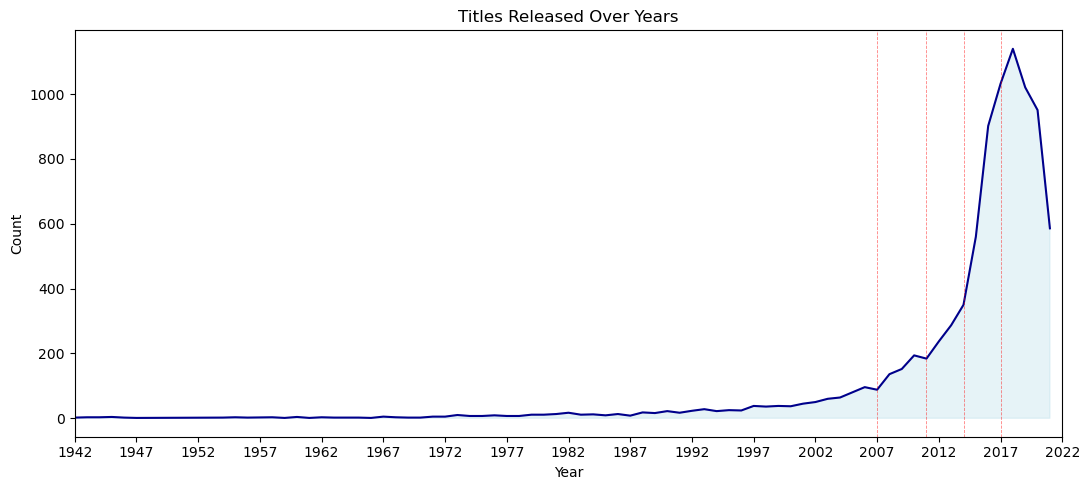

In [83]:
plt.figure(figsize=(11,5))
sns.lineplot(x='release_year', y='title', color ='darkblue', data = titles_released_by_year)
plt.fill_between(titles_released_by_year['release_year'], titles_released_by_year['title'], color='lightblue', alpha=0.3)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Titles Released Over Years')
plt.axvline(x=2007, color='red', linestyle='--', alpha= 0.5, lw=0.6)
plt.axvline(x=2011, color='red', linestyle='--', alpha= 0.5, lw=0.6)
plt.axvline(x=2014, color='red', linestyle='--', alpha= 0.5, lw=0.6)
plt.axvline(x=2017, color='red', linestyle='--', alpha= 0.5, lw=0.6)
plt.xlim(1942, 2021)
plt.xticks(np.arange(1942, 2025, 5), rotation=0)
plt.tight_layout()
plt.savefig('N_00')
plt.show()

In [84]:
movies_released_by_year = movie.groupby('release_year')['title'].nunique().reset_index()
movies_released_by_year

,release_year,title
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,763
70,2019,627
71,2020,515


In [85]:
movies_released_by_year['release_year'].unique()

array([1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [86]:
tvshow_released_by_year = tv_show.groupby('release_year')['title'].nunique().reset_index()
tvshow_released_by_year

,release_year,title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


In [87]:
tvshow_released_by_year['release_year'].unique()

array([1925, 1945, 1946, 1963, 1967, 1972, 1974, 1977, 1979, 1981, 1985,
       1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [88]:
#outlier check
tv_show.loc[tv_show['release_year'] == 1925]

,type,title,director,actor,country,date_added,release_year,rating,duration,genre,year_added,month_added,week_of_month_added,week_of_year_added,day_of_week_added
98923,TV Show,Pioneers: First Women Filmmakers*,Unknown_Director,Unknown_actor,United States,2018-12-30,1925,TV-14,1,TV Shows,2018,12,5,52,Sun


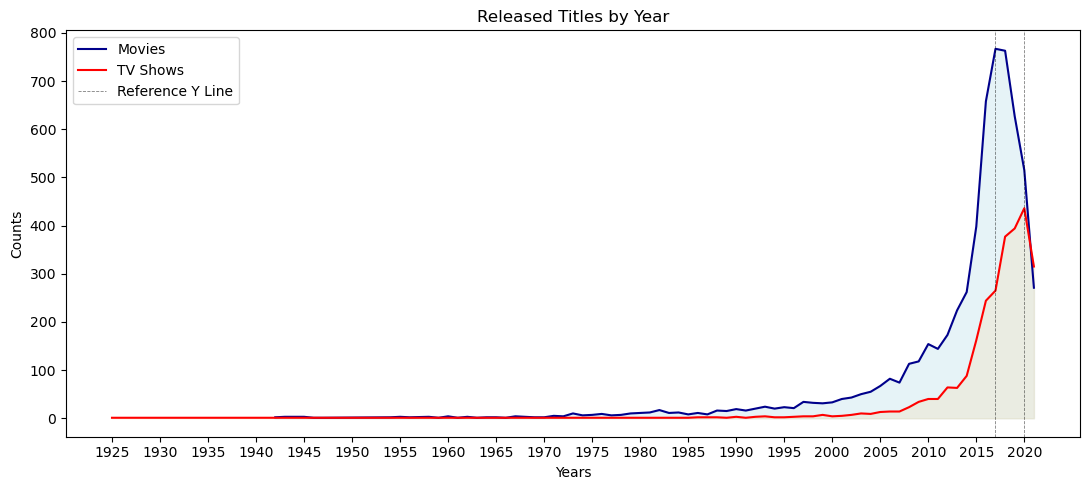

In [89]:
plt.figure(figsize=(11,5))

sns.lineplot(x='release_year', y='title', data=movies_released_by_year, label='Movies', color='darkblue')
plt.fill_between(movies_released_by_year['release_year'], movies_released_by_year['title'], color='lightblue', alpha=0.3)
sns.lineplot(x='release_year', y='title', data=tvshow_released_by_year, label='TV Shows', color='red')
plt.fill_between(tvshow_released_by_year['release_year'], tvshow_released_by_year['title'], color='wheat', alpha=0.3)

plt.axvline(x=2017, color='black', linestyle='--', label='Reference Y Line', alpha= 0.5, lw=0.6)
plt.axvline(x=2020, color='black', linestyle='--', alpha= 0.5, lw=0.6)

plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Released Titles by Year')
plt.legend()
plt.xticks(np.arange(1925,2025,5))
plt.tight_layout()
plt.savefig('N_01')
plt.show()

##### **Insights**

* Atleast 1 title has been added each from year which was released after 1954, in which, for movie, the year is 1942 onwards and for tv shows it is 1988 onwards.
* Titles released after 1990s has been added with steady increase in each year till 2007.
* Titles released after 2007 has been addded with exponential increase in each coming year.
* Titles released in 2007 & 2011 both shows a degrowth in title addition compared to their previous years and then have showed exponetial growth for titles released in oncoming years. Cause of decline needs to be further checked.
* titles released after 2014 has been added most in terms of absolute numbers with highest rate of increase.
* Most no of titles were added in 2018 after that a sharp growth is observed.
* Movies & TV shows released additon is quite identical to each other, indicating that some proportion of movies & tv shows is being maintained in platform's title collection.
* Title `Pioneers: First Women Filmmakers*` released in year 1925 is an outlier and might be a critically acclaimed title or might be a tribute also.

#### Distribution of titles added across year & month

##### Analysis

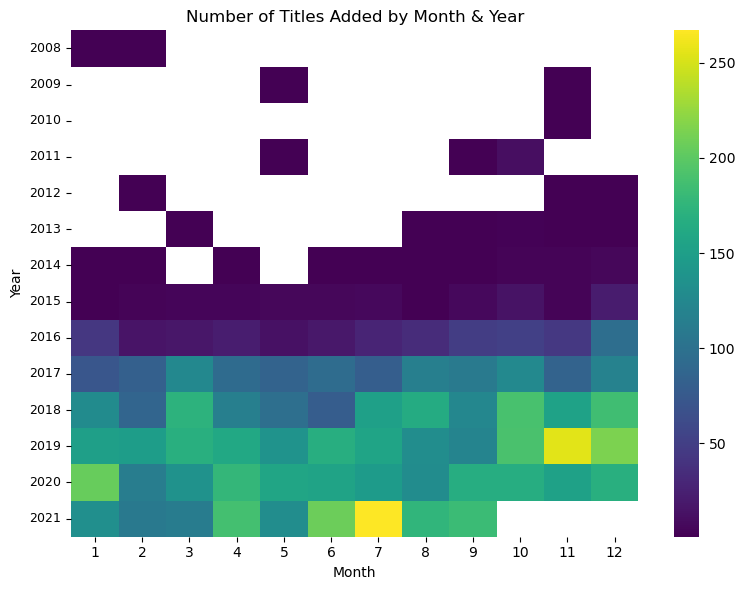

In [90]:
# Creating a pivot table to reshape the data
titles_by_month = data.pivot_table(index='year_added', columns='month_added', values='title', aggfunc='nunique')

plt.figure(figsize=(8, 6))
sns.heatmap(titles_by_month, cmap='viridis')
plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(fontsize = 9)
plt.title('Number of Titles Added by Month & Year')
plt.tight_layout()
plt.savefig('N_02')
plt.show()

##### **Insights**

* Titles added each year has been accelerating over the years.
* Tiltes have been regularly added from 2015, where addition has seen growth as the month has progressed in each year.
* July 2021 hav see been most title addition till date followed by Nov 2021. 
* Month of Feb sees a particular slowdown in new title's addition in last 5 years, whereas, last 3 months shows an overall uptrend for respective years in title addition.

#### Yearly Title Addition

##### Analysis

In [91]:
titles_added_by_year = data.groupby('year_added')['title'].nunique().reset_index()
titles_added_by_year

,year_added,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1184


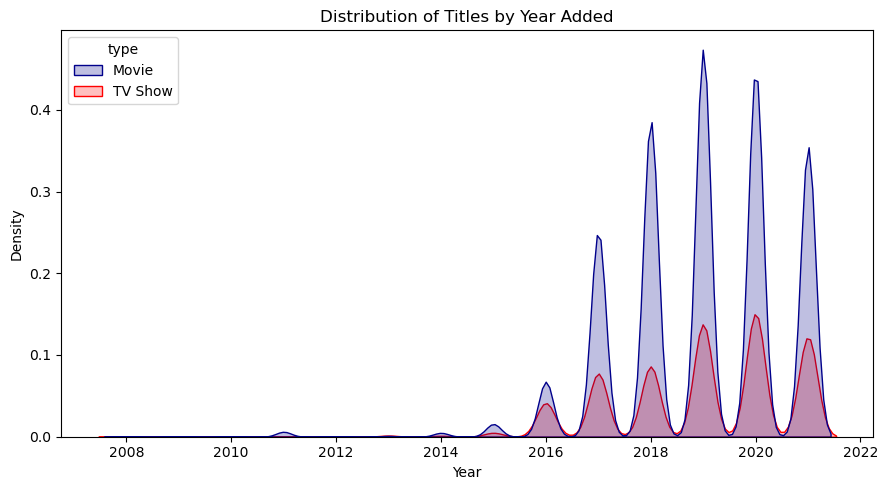

In [92]:
plt.figure(figsize=(9, 5))
ax = sns.kdeplot(data=data, x='year_added', fill=True, hue='type',legend = 'type', palette=['darkblue', 'red'])
plt.title('Distribution of Titles by Year Added')
plt.xlabel('Year')
plt.ylabel('Density')
sns.move_legend(ax, 'upper left')
plt.tight_layout()
plt.savefig('N_03')
plt.show()

##### **Insights**

* Titles added in 2016 sees an substantial uptick from usual volumes peaking out in 2019, in which, movie peaks out in 2019 and tv shows peaks out in 2020.

#### Titles Added & Released Compared

##### Analysis

In [93]:
titles_released_by_year_compare = titles_released_by_year.tail(14)
titles_released_by_year_compare

,release_year,title
60,2008,136
61,2009,152
62,2010,194
63,2011,184
64,2012,237
65,2013,287
66,2014,350
67,2015,560
68,2016,902
69,2017,1032


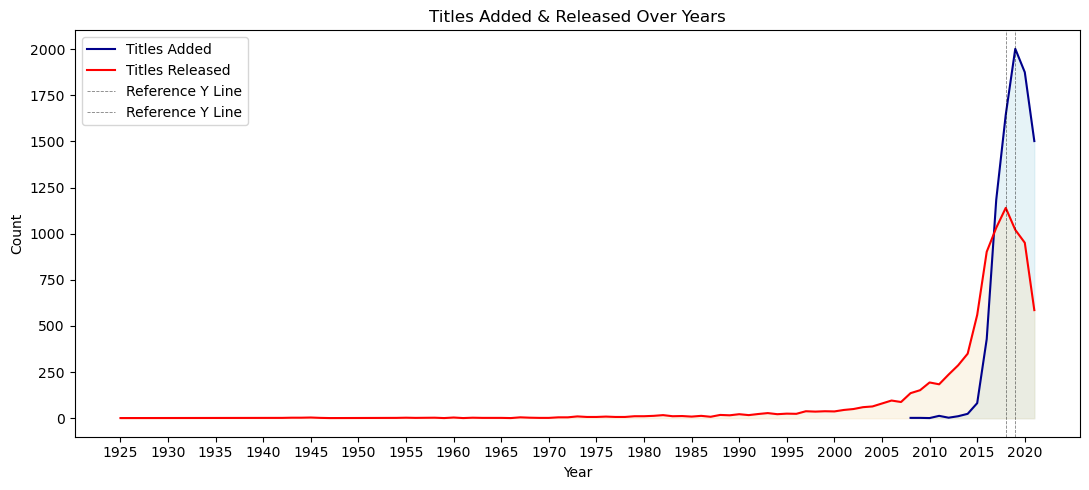

In [94]:
plt.figure(figsize=(11,5))
sns.lineplot(x='year_added', y='title', data=titles_added_by_year, color ='darkblue',label='Titles Added')
plt.fill_between(titles_added_by_year['year_added'], titles_added_by_year['title'], color='lightblue', alpha=0.3, )
sns.lineplot(x='release_year', y='title', color ='red', data = titles_released_by_year, label='Titles Released')
plt.fill_between(titles_released_by_year['release_year'], titles_released_by_year['title'], color='wheat', alpha=0.3, )

plt.axvline(x=2018, color='black', linestyle='--', label='Reference Y Line', alpha= 0.5, lw=0.6)
plt.xlabel('Year')
plt.axvline(x=2019, color='black', linestyle='--', label='Reference Y Line', alpha= 0.5, lw=0.6)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Titles Added & Released Over Years')
plt.legend()
plt.xticks(np.arange(1925,2025, 5))
plt.tight_layout()
plt.savefig('N_04')
plt.show()

##### **Insights**

* Comparing both the plot lines, we see an identical trend being followed(obviously), but titles added is much bigger in magnitude, indicating that along with the most recent titles, other titles are also being added substantially over time.
* By observation, we can see that magnitude of titles added  is almost double of titles released in recent years(~2008 onwards), thus, showcasing that, for every 1 recent title, 1 old title is also added.
* Titles added is also lagging behind the titles released, which is quite evident from the identical nature of lines, where, former peaks out in 2019 while later in 2018.

##### Analysis

Since, services has started from year 2008, hence, let's compare the relevant years by zooming in on this plot.

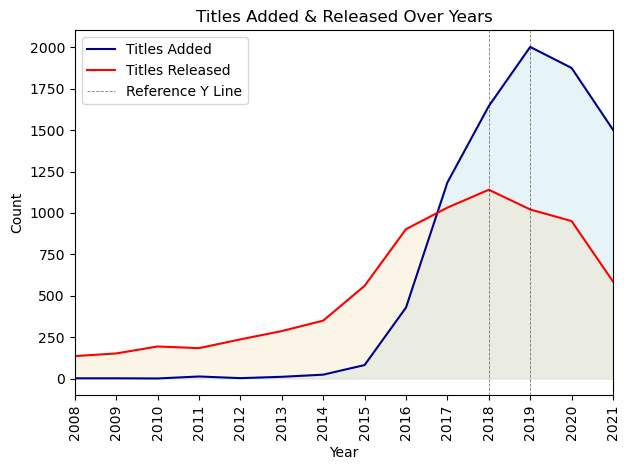

In [95]:
#plt.figure(figsize=(11,5))
sns.lineplot(x='year_added', y='title', data=titles_added_by_year, color ='darkblue',label='Titles Added')
plt.fill_between(titles_added_by_year['year_added'], titles_added_by_year['title'], color='lightblue', alpha=0.3, )
sns.lineplot(x='release_year', y='title', color ='red', data = titles_released_by_year, label='Titles Released')
plt.fill_between(titles_released_by_year['release_year'], titles_released_by_year['title'], color='wheat', alpha=0.3, )

plt.axvline(x=2018, color='black', linestyle='--', label='Reference Y Line', alpha= 0.5, lw=0.6)
plt.xlabel('Year')
plt.axvline(x=2019, color='black', linestyle='--', alpha= 0.5, lw=0.6)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Titles Added & Released Over Years')
plt.legend()
plt.xticks(np.arange(2008,2022, 1), rotation=90)
plt.xlim(2008,2021)
plt.tight_layout()
plt.savefig('N_05')
plt.show()

##### **Insights**

* Zoomed up plot quite evidently backs our previous observations. Identical graphs with different magnitude & lag.
* Lag is of 1 year, which means, usually it takes up to an year for a title to be added from its release date.

##### Delay in Title Onboarding

Let's confirm our observation mathmateically also

In [96]:
title_added_mode = data['year_added'].mode()[0]
title_added_mode

2019

In [97]:
title_released_mode = data['release_year'].mode()[0]
title_released_mode

2018

In [98]:
#delay in title onboarding mode
title_added_mode - title_released_mode

1

In [99]:
movie_added_mode = movie['year_added'].mode()[0]
movie_added_mode

2019

In [100]:
movie_released_mode = movie['release_year'].mode()[0]
movie_released_mode

2018

In [101]:
#delay in title onboarding mode
movie_added_mode - movie_released_mode

1

In [102]:
tvshow_added_mode = tv_show['year_added'].mode()[0]
tvshow_added_mode

2020

In [103]:
tvshow_released_mode = tv_show['release_year'].mode()[0]
tvshow_released_mode

2020

In [104]:
tvshow_added_mode - tvshow_released_mode

0

##### **Insights**

* Delay in Title onboarding is 1 year.
* Delay in movie onboarding is 1 year.
* There is no delay in TV Shows onboarding.

#### Monthly Title Addition

##### Analysis

In [105]:
titles_added_by_month = data.groupby('month_added')['title'].nunique().reset_index().sort_values('title', ascending = False)
titles_added_by_month

,month_added,title
6,7,835
11,12,813
3,4,763
8,9,763
9,10,757
7,8,751
2,3,738
0,1,734
5,6,727
10,11,704


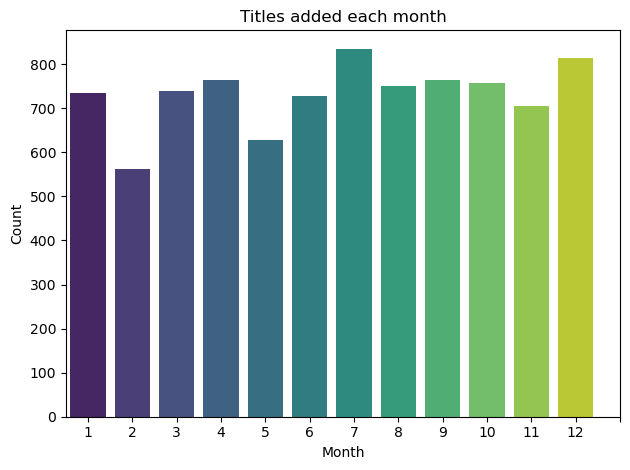

In [106]:
sns.barplot(x='month_added', y='title', data=titles_added_by_month, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Titles added each month')
plt.xticks(np.arange(0,13))
plt.tight_layout()
plt.savefig('N_06')
plt.show()

##### **Insights**

* September sees the most additon of titles over the year followed by December.
* February sees that least addition of titles in the year, followed by May.
* Overall, in latter half of year, more titles are added comparatively as compared to first half.

> **Note**: There is quite a substantial fall in introduction of new titles in month of Feb, but the growth & fall is not quite visible in the bargraph, hence, let's exaggerate the features to confirm
the trends.

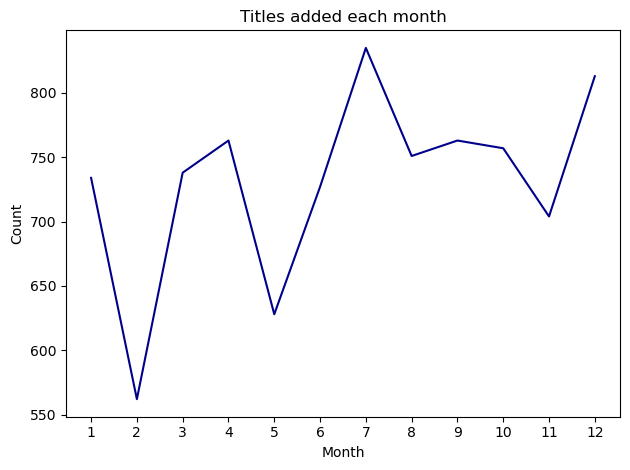

In [107]:
sns.lineplot(x='month_added', y='title', data=titles_added_by_month, color ='darkblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Titles added each month')
plt.xticks(np.arange(1,13))
plt.tight_layout()
plt.savefig('N_07')
plt.show()

In terms of absolute scale, now the rate of growth & fall is quite clearly visible. This also backs our previous observation quite clearly.

##### Analysis

In [108]:
movie_added_by_month = movie.groupby('month_added')['title'].nunique().reset_index()
movie_added_by_month

,month_added,title
0,1,543
1,2,381
2,3,527
3,4,549
4,5,436
5,6,491
6,7,564
7,8,515
8,9,512
9,10,543


In [109]:
tvshow_added_by_month = tv_show.groupby('month_added')['title'].nunique().reset_index()
tvshow_added_by_month

,month_added,title
0,1,191
1,2,181
2,3,211
3,4,214
4,5,192
5,6,236
6,7,271
7,8,236
8,9,251
9,10,214


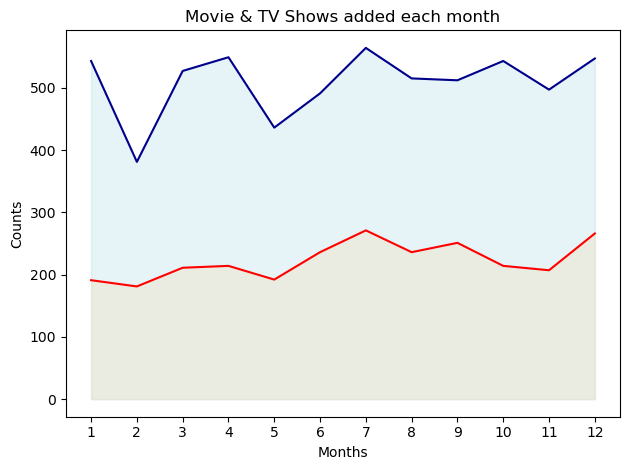

In [110]:
sns.lineplot(x='month_added', y='title', data=movie_added_by_month, color ='darkblue')
plt.fill_between(movie_added_by_month['month_added'], movie_added_by_month['title'], color='lightblue', alpha=0.3)
sns.lineplot(x='month_added', y='title', data=tvshow_added_by_month, color ='red')
plt.fill_between(tvshow_added_by_month['month_added'], tvshow_added_by_month['title'], color='wheat', alpha=0.3)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Movie & TV Shows added each month')
plt.xticks(np.arange(1,13))
plt.tight_layout()
plt.savefig('N_08')
plt.show()

##### **Insights**

* Both movies & TV shows similar pattern but with fall or growth being much more substantial for movies which is expected.

#### Week of Month

##### Analysis

In [111]:
titles_added_by_week_of_month = data.groupby('week_of_month_added')['title'].nunique().reset_index()
titles_added_by_week_of_month

,week_of_month_added,title
0,1,3501
1,2,1260
2,3,2041
3,4,1351
4,5,622


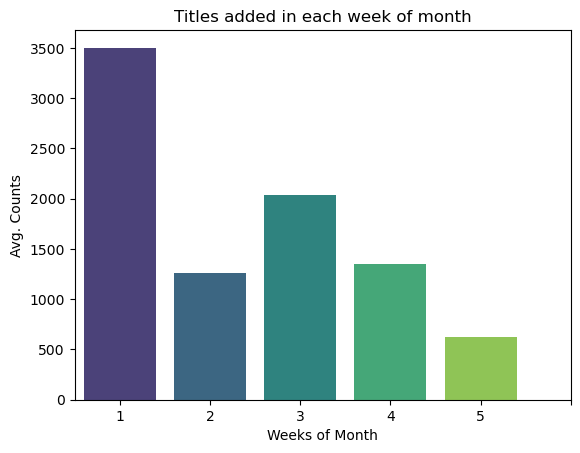

In [112]:
sns.barplot(x='week_of_month_added', y='title', data=titles_added_by_week_of_month, palette='viridis')
plt.xlabel('Weeks of Month')
plt.ylabel('Avg. Counts')
plt.title('Titles added in each week of month')
plt.xticks(np.arange(0,6))
plt.savefig('N_09')
plt.show()

In [113]:
movies_added_by_week_of_month = movie.groupby('week_of_month_added')['title'].nunique().reset_index()
movies_added_by_week_of_month

,week_of_month_added,title
0,1,2577
1,2,817
2,3,1388
3,4,923
4,5,400


In [114]:
tvshow_added_by_week_of_month = tv_show.groupby('week_of_month_added')['title'].nunique().reset_index()
tvshow_added_by_week_of_month

,week_of_month_added,title
0,1,924
1,2,443
2,3,653
3,4,428
4,5,222


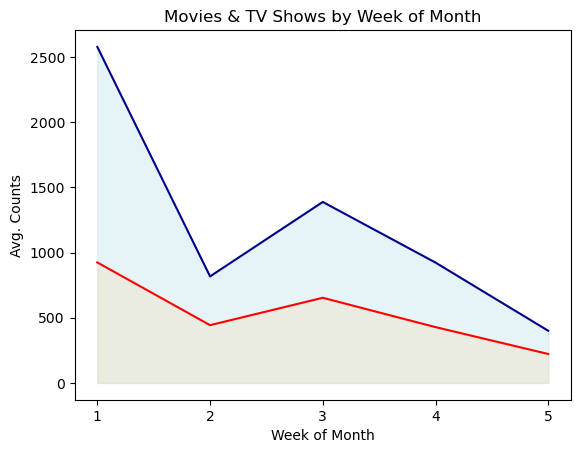

In [115]:
#plt.figure(figsize=(6, 6))

sns.lineplot(x='week_of_month_added', y='title', data=movies_added_by_week_of_month, color='darkblue')
plt.fill_between(movies_added_by_week_of_month['week_of_month_added'], movies_added_by_week_of_month['title'], color='lightblue', alpha = 0.3)
sns.lineplot(x='week_of_month_added', y='title',data=tvshow_added_by_week_of_month, color='red')
plt.fill_between(tvshow_added_by_week_of_month['week_of_month_added'], tvshow_added_by_week_of_month['title'], color='wheat', alpha = 0.3)
plt.xlabel('Week of Month')
plt.ylabel('Avg. Counts')
plt.title('Movies & TV Shows by Week of Month')
plt.xticks(np.arange(1,6))
plt.savefig('N_10')
plt.show()

##### **Insights**

* 1st week of month sees the most number of new title additions, while falling quite sharply from 2nd week onwards.
* Movie & TV shows both follow this overall trend, where fall from 1st to 5th week is much more pronounced for movies.

#### Week of Year

##### Analysis

In [116]:
titles_added_by_week_of_year = data.groupby('week_of_year_added')['title'].nunique().reset_index()
titles_added_by_week_of_year['week_of_year_added']= titles_added_by_week_of_year['week_of_year_added'].astype('category')

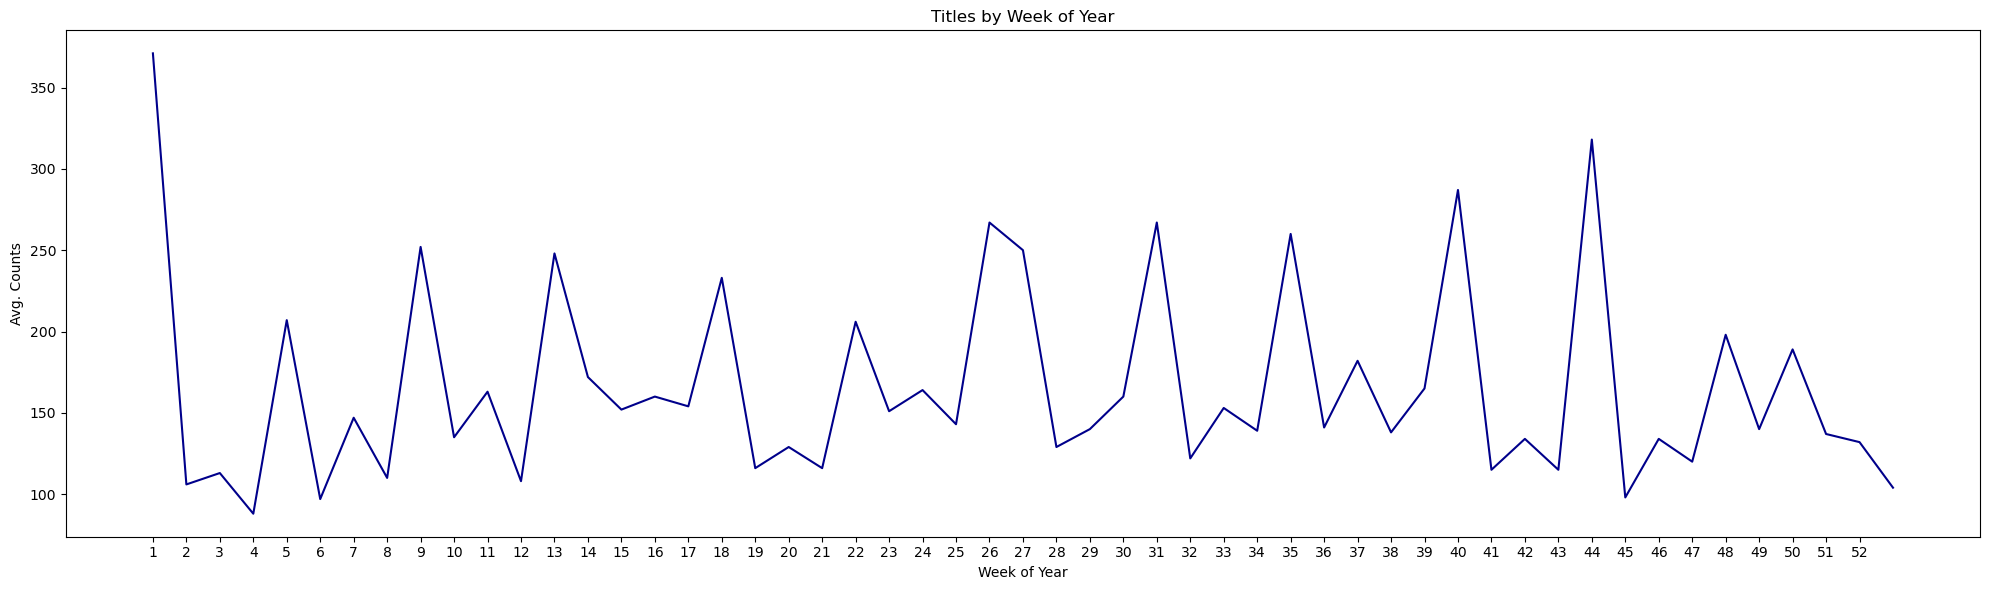

In [117]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='week_of_year_added', y='title', data=titles_added_by_week_of_year, color='darkblue')
plt.xlabel('Week of Year')
plt.ylabel('Avg. Counts')
plt.title('Titles by Week of Year')
plt.xticks(np.arange(1,53, 1))
plt.tight_layout()
plt.savefig('N_11')
plt.show()

In [118]:
movies_added_by_week_of_year = movie.groupby('week_of_year_added')['title'].nunique().reset_index()
movies_added_by_week_of_year['week_of_year_added'] = movies_added_by_week_of_year['week_of_year_added'].astype('category')

In [119]:
tvshow_added_by_week_of_year = tv_show.groupby('week_of_year_added')['title'].nunique().reset_index()
tvshow_added_by_week_of_year['week_of_year_added'] = tvshow_added_by_week_of_year['week_of_year_added'].astype('category')

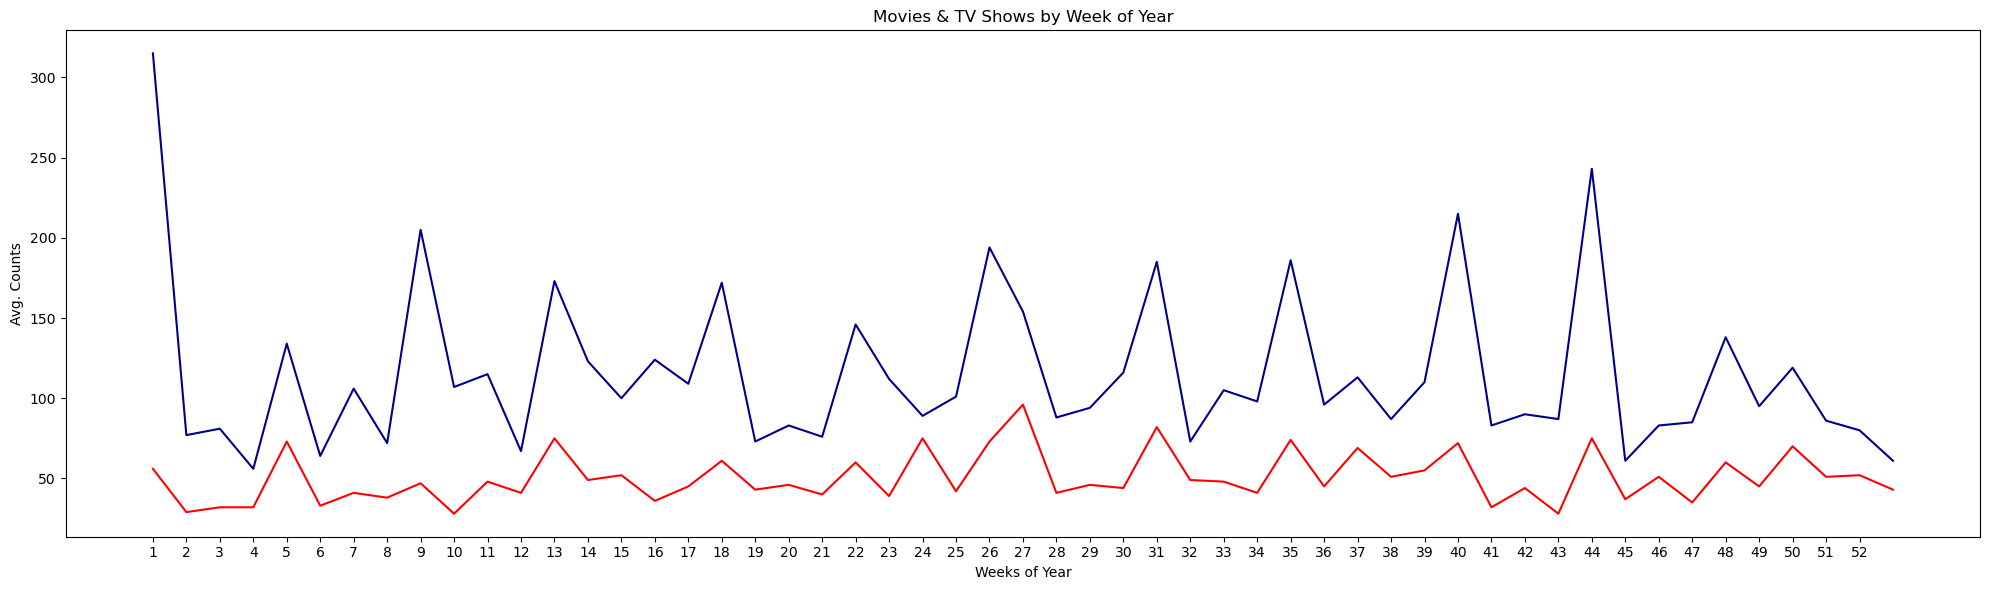

In [120]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='week_of_year_added', y='title', data=movies_added_by_week_of_year, color='darkblue')
sns.lineplot(x='week_of_year_added', y='title',data=tvshow_added_by_week_of_year, color='red')
plt.xlabel('Weeks of Year')
plt.ylabel('Avg. Counts')
plt.title('Movies & TV Shows by Week of Year')
plt.xticks(np.arange(1,53))
plt.tight_layout()
plt.savefig('N_12')
plt.show()

##### **Insights**

* 1st week of year sees exceptional number of new titles added comapre to all the remaining week of the year.
* Each peak is followed by sharp fall and again rises after 3 gap of 3 weeks. Basically, every 1st week of month it peaks and then subsides until the 1st week of next month comes.
* This cycle is now quite evident, since, every week of month also showed the same trend before.

#### Day of Week

##### Analysis

In [121]:
titles_added_by_day_of_week = data.groupby('day_of_week_added')['title'].nunique().reset_index().sort_values('title')
titles_added_by_day_of_week

,day_of_week_added,title
3,Sun,750
2,Sat,813
1,Mon,846
5,Tue,1205
6,Wed,1281
4,Thu,1394
0,Fri,2486


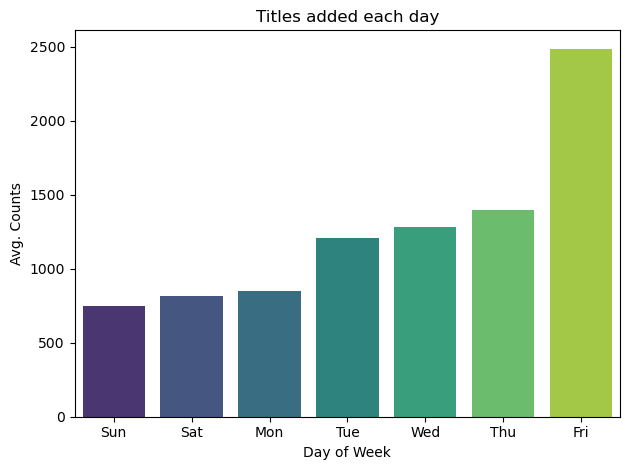

In [122]:
sns.barplot(x='day_of_week_added', y='title', data=titles_added_by_day_of_week, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Counts')
plt.title('Titles added each day')
plt.tight_layout()
plt.savefig('N_13')
plt.show()

##### **Insights**

* On Friday, most titles are added.
* If weeks starts from Sunday, then title addition increase as the day passes, with Friay being the primary day for title addition.
* Since, Saturday & Sunday are off days hence it is most likely that titles are added over Friday for weekend consumption.

### Ratings

##### Analysis

In [123]:
all_ratings = data.groupby('rating')['title'].nunique().reset_index().sort_values('title', ascending=False)

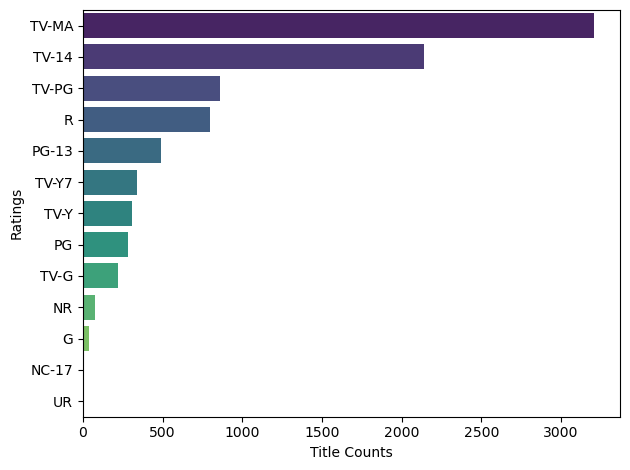

In [124]:
sns.barplot(data=all_ratings, y='rating', x='title', palette='viridis')
plt.xlabel('Title Counts')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig('N_14')
plt.show()

In [125]:
movie_ratings = movie.groupby('rating')['title'].nunique().reset_index().sort_values('title', ascending=False)

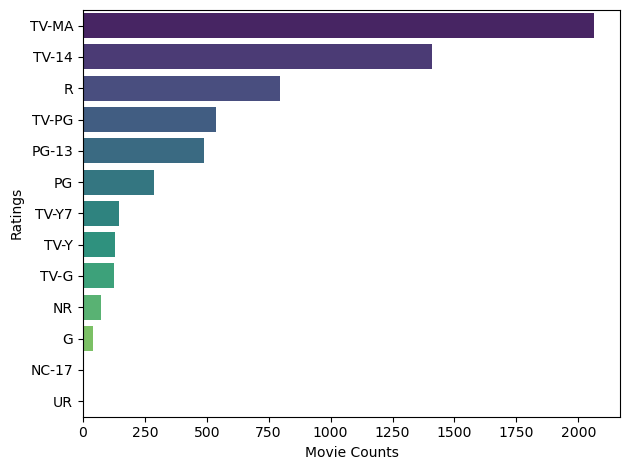

In [126]:
sns.barplot(data=movie_ratings, y='rating', x='title', palette='viridis')
plt.xlabel('Movie Counts')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig('N_15')
plt.show()

In [127]:
tvshow_ratings = tv_show.groupby('rating')['title'].nunique().reset_index().sort_values('title', ascending=False)

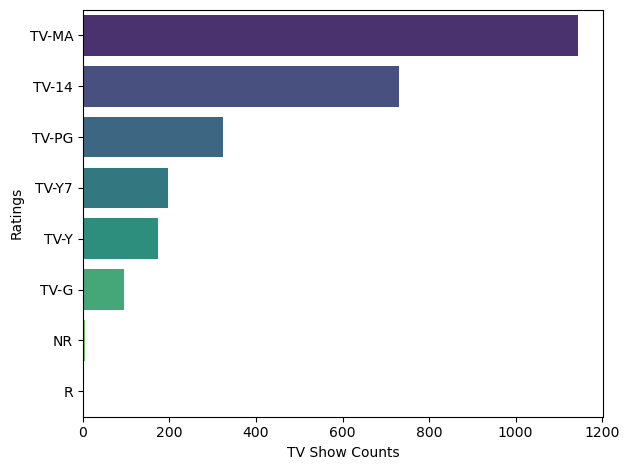

In [128]:
sns.barplot(data=tvshow_ratings, y='rating', x='title', palette='viridis')
plt.xlabel('TV Show Counts')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig('N_16')
plt.show()

##### **Insights**

* Most titles added are rated for mature audiences followed by teenagers/youngadults.
* Movies are a bit more distrbuted among different rating categories than TV shows.Hence, offering more variety to young audiences also.

### Duration

##### Analysis

In [129]:
all_duration = data.groupby('duration')['title'].nunique().reset_index()
all_duration

,duration,title
0,1,1788
1,2,425
2,3,199
3,4,95
4,5,66
...,...,...
205,233,1
206,237,1
207,253,1
208,273,1


In [130]:
all_duration['duration'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 18

In [131]:
movie_duration = movie.groupby('duration')['title'].nunique().reset_index()
movie_duration['duration'].unique()

array([  3,   5,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 189, 19

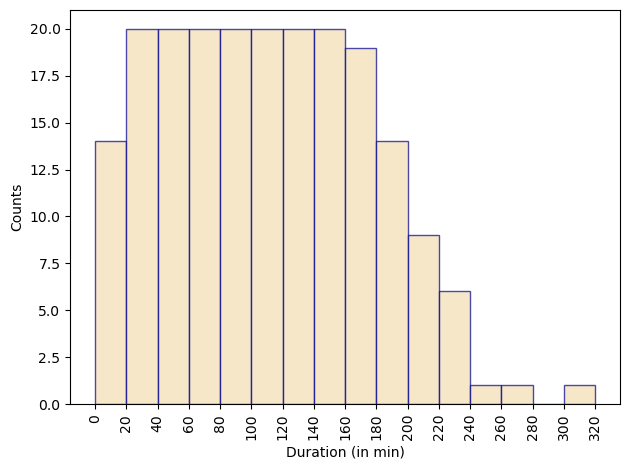

In [132]:
bin_dur = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]

plt.hist(movie_duration['duration'], edgecolor='darkblue', alpha=0.7, bins=bin_dur, color='wheat')
plt.xlabel('Duration (in min)')
plt.ylabel('Counts')
plt.xticks(bin_dur, rotation=90)
plt.tight_layout()
plt.savefig('N_17')
plt.show()

In [133]:
tvshow_duration = tv_show.groupby('duration')['title'].nunique().reset_index()

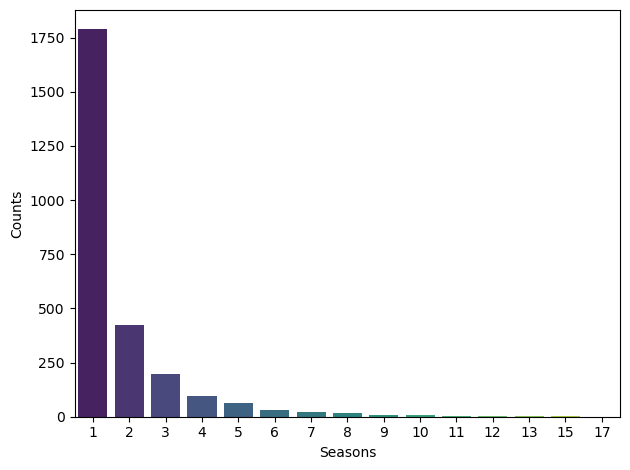

In [134]:
sns.barplot(x='duration', y='title', data=tvshow_duration, palette='viridis')
plt.xlabel('Seasons')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('N_18')
plt.show()

##### **Insights**

* Most prefereed duration range is from 20-160 minutes.
* Such a wide duration indicates the availability of differnt type of contents quite uniformally in availalble titles, thus, catering to all kinds of customers with attention span time.

### Genre

##### Analysis

In [135]:
all_genre = data.groupby('genre')['title'].nunique().reset_index().sort_values('title', ascending=False)
all_genre['genre'].nunique()

42

In [136]:
top_10_genre = all_genre.head(10)
top_10_genre

,genre,title
16,International Movies,2732
12,Dramas,2416
7,Comedies,1665
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,853
34,TV Dramas,761
15,Independent Movies,755
4,Children & Family Movies,639
24,Romantic Movies,615


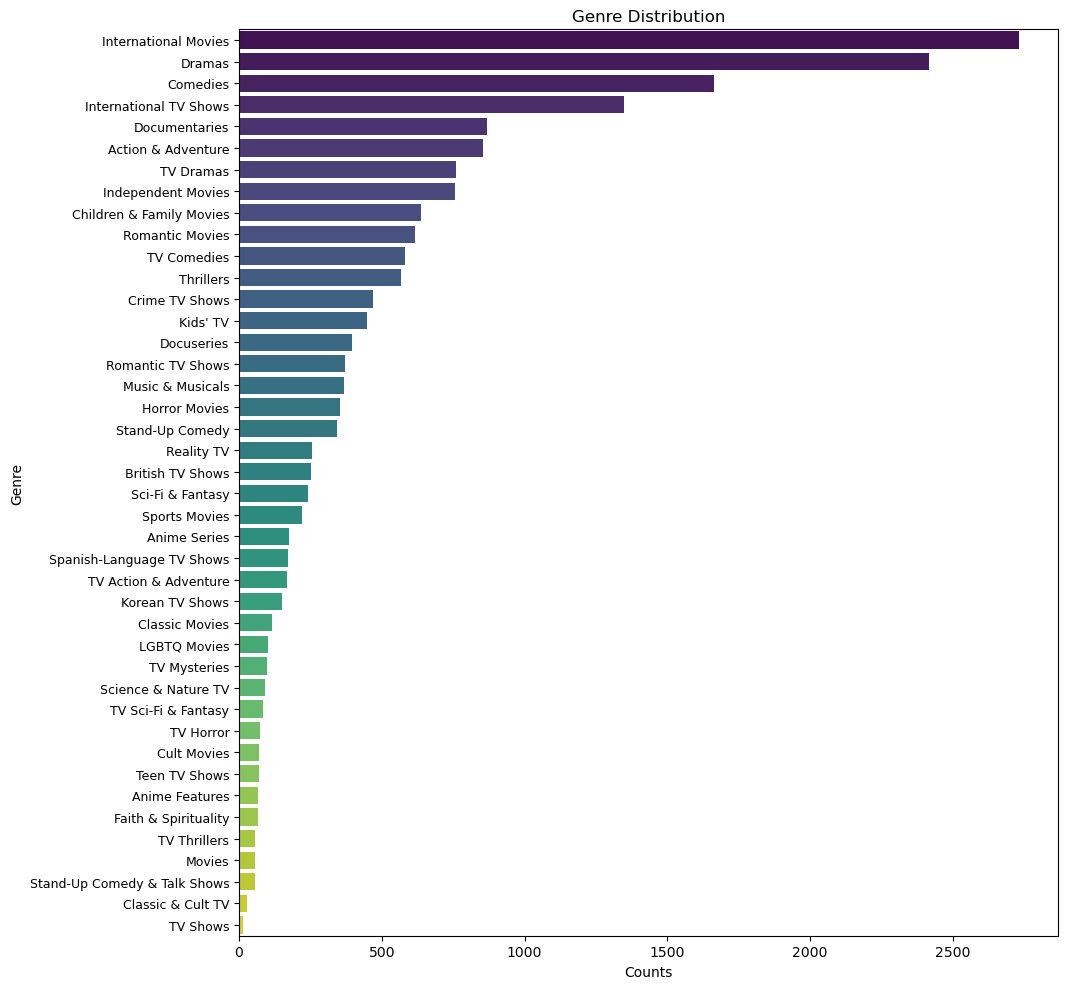

In [137]:
plt.figure(figsize=(11, 10))
sns.barplot(x='title', y='genre', data=all_genre, palette='viridis')
plt.xlabel('Counts')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.tight_layout()
plt.yticks(fontsize=9)
plt.savefig('N_19')
plt.show()

In [138]:
movie_genre = movie.groupby('genre')['title'].nunique().reset_index().rename(columns={'genre': 'Genre','title': 'Count'}).sort_values('Count', ascending=False)
tvshow_genre = tv_show.groupby('genre')['title'].nunique().reset_index().rename(columns={'genre': 'Genre','title': 'Count'}).sort_values('Count', ascending=False)
movie_genre.head(10)

,Genre,Count
11,International Movies,2732
7,Dramas,2416
4,Comedies,1665
6,Documentaries,869
0,Action & Adventure,853
10,Independent Movies,755
2,Children & Family Movies,639
15,Romantic Movies,615
19,Thrillers,569
14,Music & Musicals,368


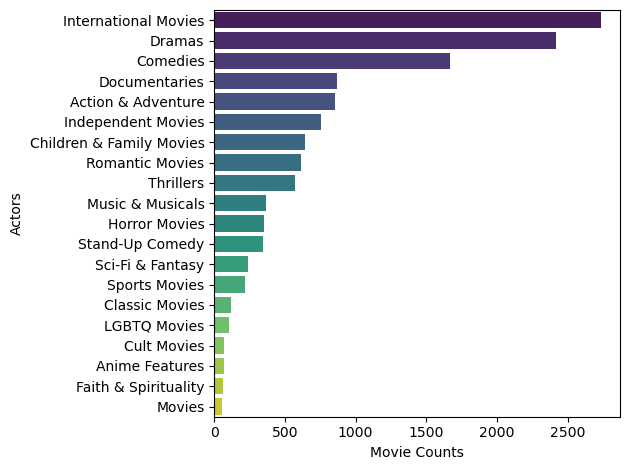

In [139]:
sns.barplot(data=movie_genre, x='Count', y='Genre', palette='viridis')
plt.xlabel('Movie Counts')
plt.ylabel('Actors')
plt.tight_layout()
plt.savefig('N_20')
plt.show()

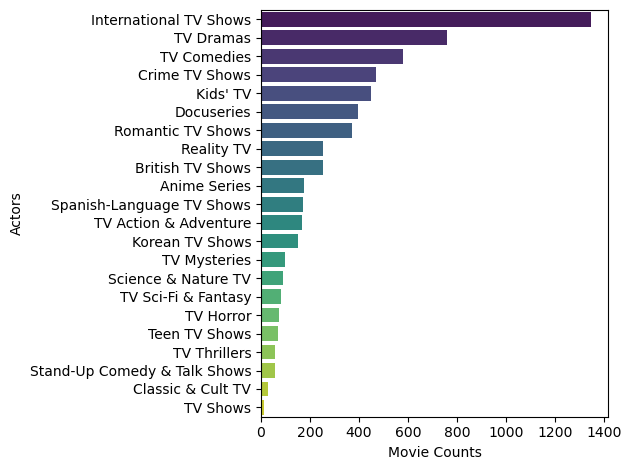

In [140]:
sns.barplot(data=tvshow_genre, x='Count', y='Genre', palette='viridis')
plt.xlabel('Movie Counts')
plt.ylabel('Actors')
plt.tight_layout()
plt.savefig('N_21')
plt.show()

##### **Insights**

* Most titles added seems to appeal to global audiences for wider acceptability.
* Most titles are of ligh-hearted comedy & drama genre, more suitable for relaxing weekend watch.
* Variety among title is quite good thus offering something for everyone.

### Country

##### Analysis

In [141]:
all_country = data.groupby(['country']).agg({"title":"nunique"}).sort_values('title', ascending = False).reset_index()
top_10_country = all_country.head(10)
top_10_country

,country,title
0,United States,4332
1,India,1141
2,United Kingdom,842
3,Canada,484
4,France,412
5,Japan,362
6,South Korea,260
7,Spain,249
8,Germany,234
9,Mexico,184


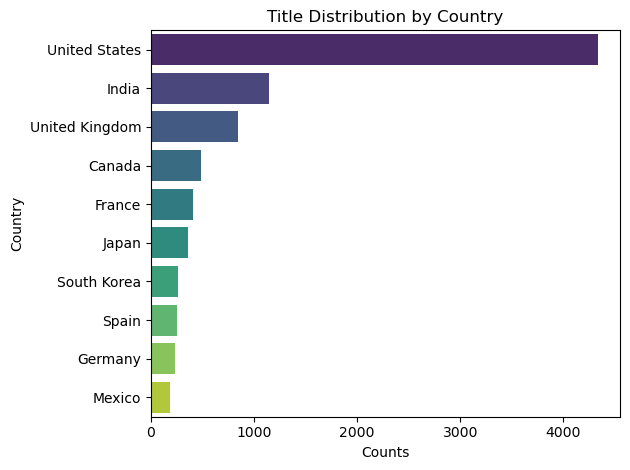

In [142]:
sns.barplot(x='title', y='country', data=top_10_country, palette='viridis')
plt.xlabel('Counts')
plt.ylabel('Country')
plt.title('Title Distribution by Country')
plt.tight_layout()
plt.savefig('N_22')
plt.show()

In [143]:
all_movie_country = movie.groupby(['country']).agg({"title":"nunique"}).sort_values('title', ascending = False).reset_index()
top_10_movie_country = all_movie_country.head(10)
top_10_movie_country

,country,title
0,United States,3032
1,India,1042
2,United Kingdom,562
3,Canada,341
4,France,318
5,Germany,187
6,Spain,178
7,Japan,135
8,Nigeria,129
9,Egypt,119


In [144]:
all_tv_show_country = tv_show.groupby(['country']).agg({"title":"nunique"}).sort_values('title', ascending = False).reset_index()
top_10_tv_show_country = all_tv_show_country.head(10)
top_10_tv_show_country

,country,title
0,United States,1300
1,United Kingdom,280
2,Japan,227
3,South Korea,196
4,Canada,143
5,India,99
6,France,94
7,Taiwan,87
8,Spain,71
9,Mexico,67


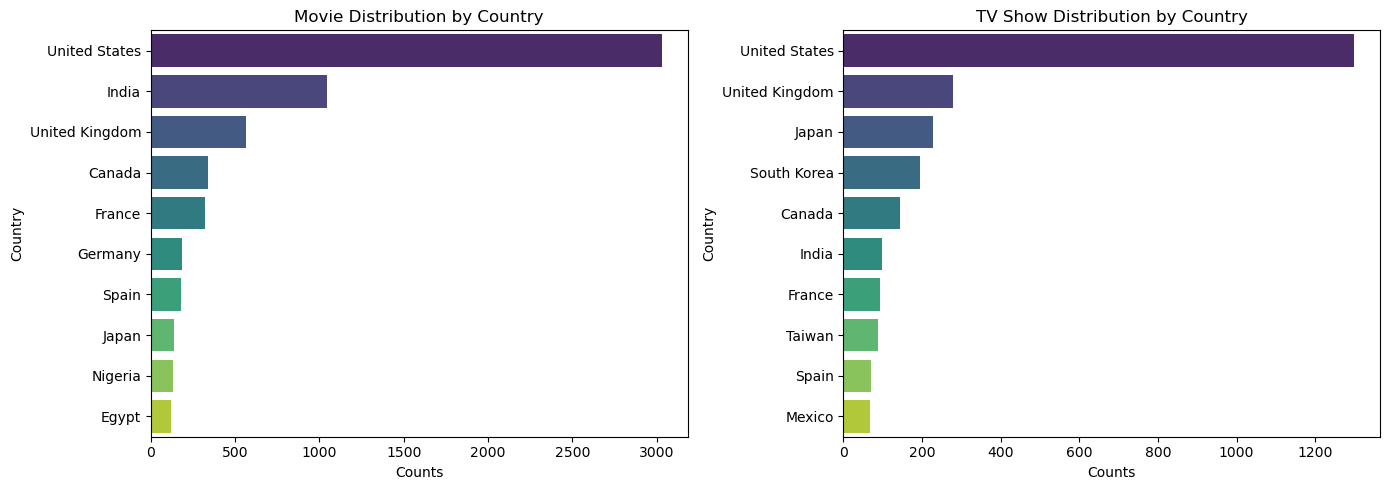

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot the Movie Distribution by Country
sns.barplot(x='title', y='country', data=top_10_movie_country, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Country')
axes[0].set_title('Movie Distribution by Country')

# Plot the TV Show Distribution by Country
sns.barplot(x='title', y='country', data=top_10_tv_show_country, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Counts')
axes[1].set_ylabel('Country')
axes[1].set_title('TV Show Distribution by Country')
plt.tight_layout()
plt.savefig('N_23')
plt.show()

##### **Insights**

* US is the dominant country showcasing the humongous number of titles indicating US as the primary producer or consumer or both.
* Indian titles are predominantly focused on movies while, on other hand, Japan & South Korea has mostly TV shows.
* US, India, UK, Canda, France are the top 5 countries where, India is the only exception which is a developing country, might be showcasing the bustling movie industry of the country.

### Top Country's Stats

##### Analysis

In [146]:
top_10_country_ordered = top_10_country['country'].to_list()

In [147]:
#top directors pf top countries
country_data_d_filtered = data[(data['director'] != 'Unknown_Director')]
top_10_country_data_d = country_data_d_filtered[country_data_d_filtered['country'].isin(top_10_country['country'])]
top_10_country_director = top_10_country_data_d.groupby('country')['director'].apply(lambda x: x.mode()[0]).reset_index()
top_10_country_director.set_index('country').loc[top_10_country_ordered].reset_index()

,country,director
0,United States,Martin Scorsese
1,India,David Dhawan
2,United Kingdom,Sarah Smith
3,Canada,Robert Vince
4,France,Thierry Donard
5,Japan,Hidenori Inoue
6,South Korea,Bong Joon Ho
7,Spain,Fernando González Molina
8,Germany,Detlev Buck
9,Mexico,Manolo Caro


In [148]:
#top actors pf top countries
country_data_filtered_a = data[(data['actor'] != 'Unknown_actor')]
top_10_country_data_a = country_data_filtered_a[country_data_filtered_a['country'].isin(top_10_country['country'])]
top_10_country_actor = top_10_country_data_a.groupby('country')['actor'].apply(lambda x: x.mode()[0]).reset_index()
top_10_country_actor.set_index('country').loc[top_10_country_ordered].reset_index()

,country,actor
0,United States,James Franco
1,India,Anupam Kher
2,United Kingdom,David Attenborough
3,Canada,John Paul Tremblay
4,France,Liam Neeson
5,Japan,Yuki Kaji
6,South Korea,Bae Doona
7,Spain,Mario Casas
8,Germany,Ben Whishaw
9,Mexico,Arcelia Ramírez


In [149]:
#genre of top countries
top_10_country_data = data[data['country'].isin(top_10_country['country'])]
top_10_country_genre = top_10_country_data.groupby('country')['genre'].apply(lambda x: x.mode()[0]).reset_index()
top_10_country_genre.set_index('country').loc[top_10_country_ordered].reset_index()

,country,genre
0,United States,Comedies
1,India,International Movies
2,United Kingdom,Dramas
3,Canada,Comedies
4,France,International Movies
5,Japan,Anime Series
6,South Korea,International TV Shows
7,Spain,International Movies
8,Germany,Dramas
9,Mexico,Spanish-Language TV Shows


In [150]:
# titles duration by top countries
top_10_country_data = data[data['country'].isin(top_10_country['country'])]
top_10_country_stats = top_10_country_data.groupby('country').agg(release_year=('release_year', lambda x: x.mode()[0]), year_added=('year_added', lambda x: x.mode()[0]), duration=('duration', lambda x: x.mean())).reset_index()
top_10_country_stats.set_index('country').loc[top_10_country_ordered].reset_index()

,country,release_year,year_added,duration
0,United States,2019,2019,74.637890
1,India,2018,2018,119.502391
2,United Kingdom,2018,2019,71.413743
3,Canada,2018,2020,69.458163
4,France,2019,2020,82.707474
5,Japan,2018,2020,43.730241
6,South Korea,2020,2019,28.980317
7,Spain,2018,2019,68.208524
8,Germany,2020,2020,84.778605
9,Mexico,2020,2019,50.880535


In [151]:
# movies duration by top countries
top_10_country_data = movie[movie['country'].isin(top_10_country['country'])]
top_10_country_stats = top_10_country_data.groupby('country').agg(release_year=('release_year', lambda x: x.mode()[0]), year_added=('year_added', lambda x: x.mode()[0]), duration=('duration', lambda x: x.mean())).reset_index()
top_10_country_stats.set_index('country').loc[top_10_country_ordered].reset_index()

,country,release_year,year_added,duration
0,United States,2017,2019,100.002471
1,India,2017,2018,128.263367
2,United Kingdom,2018,2019,106.702384
3,Canada,2018,2020,95.063241
4,France,2016,2020,103.174556
5,Japan,2017,2021,104.745139
6,South Korea,2018,2019,112.328998
7,Spain,2018,2019,105.023606
8,Germany,2016,2019,108.310564
9,Mexico,2016,2017,100.738597


In [152]:
# tv shows duration by top countries
top_10_country_data = tv_show[tv_show['country'].isin(top_10_country['country'])]
top_10_country_stats = top_10_country_data.groupby('country').agg(release_year=('release_year', lambda x: x.mode()[0]), year_added=('year_added', lambda x: x.mode()[0]), duration=('duration', lambda x: x.mean())).reset_index()
top_10_country_stats.set_index('country').loc[top_10_country_ordered].reset_index()

,country,release_year,year_added,duration
0,United States,2019,2021,2.479646
1,India,2021,2021,1.119903
2,United Kingdom,2019,2019,2.292158
3,Canada,2019,2020,3.178826
4,France,2020,2020,1.697991
5,Japan,2018,2020,1.553941
6,South Korea,2020,2019,1.232807
7,Spain,2020,2020,1.862122
8,Germany,2020,2020,1.476434
9,Mexico,2019,2019,1.792854


##### **Insights**

* South Korea prefereed genre is `International TV shows`, which further reinforces our previous observation indicating South Korean titles mostly TV shows.
* Mexico's top genre is `Spanish-Language TV Shows` which may seem odd at first glance, but 99% population are Spanish speaing so that is to be expected.
* Expectedly, anime is the most common genre of japansese titles.
* Indian movies are of longest duration, while, Canadian movies have the shortest avg. duration respectively among the top 10 countries.
* Canadian tv shows usually run for an average of atleast 3 seasons followed by US with atleaset 2 seasons on average.
* All the top 10 countries TV shows usually have follow up seasons indicating continuity in tv shows spanning over years.

### Directors

##### Analysis

In [153]:
all_directors = data.groupby('director')['title'].nunique().reset_index().sort_values('title', ascending=False)
all_directors

,director,title
4743,Unknown_Director,2626
3748,Rajiv Chilaka,22
1906,Jan Suter,21
3799,Raúl Campos,19
4456,Suhas Kadav,16
...,...,...
2290,José Miguel Contreras,1
2291,José Ortuño,1
630,Brad Rothschild,1
2293,Jovanka Vuckovic,1


In [154]:
top_10_directors = all_directors.head(10)
top_10_directors.reset_index(drop=True)

,director,title
0,Unknown_Director,2626
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Youssef Chahine,12


In [155]:
top_10_directors = all_directors[1:].head(10).reset_index(drop=True)
top_10_directors['director'].unique()

array(['Rajiv Chilaka', 'Jan Suter', 'Raúl Campos', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Jay Chapman',
       'Youssef Chahine', 'Martin Scorsese'], dtype=object)

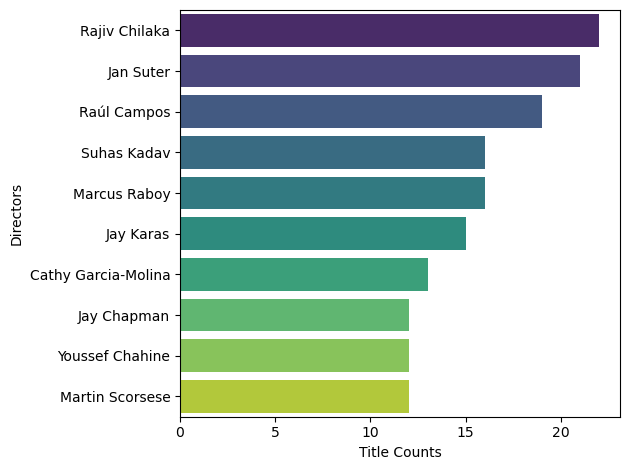

In [156]:
sns.barplot(data=top_10_directors, x='title', y='director', palette='viridis')
plt.tight_layout()
plt.xlabel('Title Counts')
plt.ylabel('Directors')
plt.tight_layout()
plt.savefig('N_24')
plt.show()

In [157]:
all_movie_directors = movie.groupby('director')['title'].nunique().reset_index().sort_values('title', ascending=False)[1:]
all_movie_directors

,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
...,...,...
2185,Joshua Z. Weinstein,1
2186,Josiah Ng,1
2187,José Eduardo Belmonte,1
2188,José Luis Gutiérrez,1


In [158]:
top_10_movie_directors = all_movie_directors.head(10)
top_10_movie_directors

,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
1859,Jay Chapman,12
2815,Martin Scorsese,12
4726,Youssef Chahine,12


In [159]:
all_tv_show_directors = tv_show.groupby('director')['title'].nunique().reset_index().sort_values('title', ascending=False)[1:]
top_10_tv_show_directors = all_tv_show_directors.head(10)
top_10_tv_show_directors

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
258,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
250,Shin Won-ho,2
234,Rob Seidenglanz,2


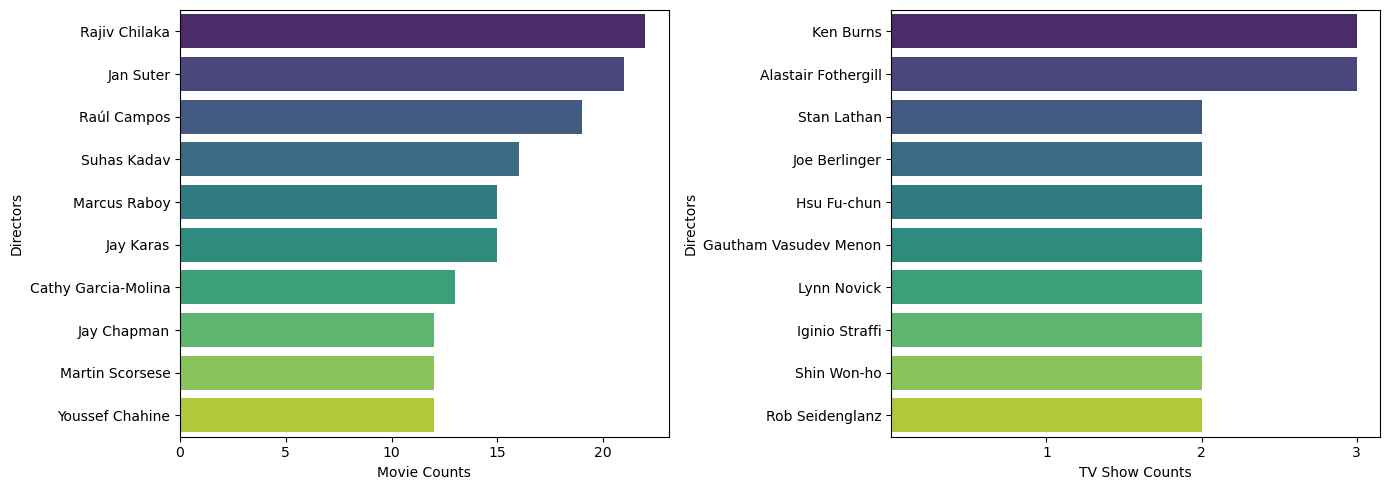

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.barplot(data=top_10_movie_directors, x='title', y='director', palette='viridis', ax=axes[0])
axes[0].set_xlabel('Movie Counts')
axes[0].set_ylabel('Directors')

sns.barplot(data=top_10_tv_show_directors, x='title', y='director', palette='viridis', ax=axes[1])
axes[1].set_xlabel('TV Show Counts')
axes[1].set_ylabel('Directors')
axes[1].set_xticks(np.arange(1,4))

plt.tight_layout()
plt.savefig('N_25')
plt.show()

### Top Director's Stats

##### Analysis

In [161]:
top_10_directors_ordered = top_10_directors['director'].to_list()
top_10_directors_data = data[data['director'].isin(top_10_directors['director'])]

top_10_directors_preferences = top_10_directors_data.groupby('director').agg(country=('country', lambda x: x.mode()[0]),
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               actor=('actor', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_directors_preferences.set_index('director').loc[top_10_directors_ordered].reset_index()

,director,country,genre,actor,title,release_year,year_added,time
0,Rajiv Chilaka,India,Children & Family Movies,Julie Tejwani,Chhota Bheem: Bheem vs Aliens,2013,2021,71.517007
1,Jan Suter,Mexico,Stand-Up Comedy,Carlos Ballarta,Ricardo O'Farrill: Abrazo navideño,2018,2018,58.481481
2,Raúl Campos,Mexico,Stand-Up Comedy,Sofía Niño de Rivera,Ricardo O'Farrill: Abrazo navideño,2018,2018,58.400000
3,Suhas Kadav,India,Children & Family Movies,Saurav Chakraborty,Motu Patlu in the City of Gold,2013,2021,78.909774
4,Marcus Raboy,United States,Stand-Up Comedy,Bob Rubin,Patton Oswalt: I Love Everything,2017,2017,51.750000
5,Jay Karas,United States,Stand-Up Comedy,Adam Pally,The Main Event,2020,2020,90.595238
6,Cathy Garcia-Molina,Philippines,International Movies,Joross Gamboa,A Second Chance,2017,2019,119.213483
7,Jay Chapman,United States,Stand-Up Comedy,Brad Paisley,Brad Paisley's Comedy Rodeo,2017,2017,61.791667
8,Youssef Chahine,Egypt,Dramas,Mahmoud El Meleigy,Alexandria ... Why?,1979,2020,123.486553
9,Martin Scorsese,United States,Dramas,Harvey Keitel,Hugo,2011,2019,144.630072


In [162]:
top_10_movie_directors_ordered = top_10_movie_directors['director'].to_list()
top_10_movie_directors_data = movie[movie['director'].isin(top_10_movie_directors['director'])]

top_10_movie_directors_preferences = top_10_movie_directors_data.groupby('director').agg(country=('country', lambda x: x.mode()[0]),
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               actor=('actor', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_movie_directors_preferences.set_index('director').loc[top_10_movie_directors_ordered].reset_index()

,director,country,genre,actor,title,release_year,year_added,time
0,Rajiv Chilaka,India,Children & Family Movies,Julie Tejwani,Chhota Bheem: Bheem vs Aliens,2013,2021,71.517007
1,Jan Suter,Mexico,Stand-Up Comedy,Carlos Ballarta,Ricardo O'Farrill: Abrazo navideño,2018,2018,58.481481
2,Raúl Campos,Mexico,Stand-Up Comedy,Sofía Niño de Rivera,Ricardo O'Farrill: Abrazo navideño,2018,2018,58.400000
3,Suhas Kadav,India,Children & Family Movies,Saurav Chakraborty,Motu Patlu in the City of Gold,2013,2021,78.909774
4,Marcus Raboy,United States,Stand-Up Comedy,Vir Das,Steve Martin and Martin Short: An Evening You ...,2017,2017,64.437500
5,Jay Karas,United States,Stand-Up Comedy,Adam Pally,The Main Event,2020,2020,90.595238
6,Cathy Garcia-Molina,Philippines,International Movies,Joross Gamboa,A Second Chance,2017,2019,119.213483
7,Jay Chapman,United States,Stand-Up Comedy,Brad Paisley,Brad Paisley's Comedy Rodeo,2017,2017,61.791667
8,Martin Scorsese,United States,Dramas,Harvey Keitel,Hugo,2011,2019,144.630072
9,Youssef Chahine,Egypt,Dramas,Mahmoud El Meleigy,Alexandria ... Why?,1979,2020,123.486553


In [163]:
top_10_tv_show_directors_ordered = top_10_tv_show_directors['director'].to_list()
top_10_tv_show_directors_data = tv_show[tv_show['director'].isin(top_10_tv_show_directors['director'])]

top_10_tv_show_directors_preferences = top_10_tv_show_directors_data.groupby('director').agg(country=('country', lambda x: x.mode()[0]),
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               actor=('actor', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_tv_show_directors_preferences.set_index('director').loc[top_10_tv_show_directors_ordered].reset_index()

,director,country,genre,actor,title,release_year,year_added,time
0,Ken Burns,United States,Docuseries,Unknown_actor,Ken Burns: The Civil War,1990,2017,1.000000
1,Alastair Fothergill,United Kingdom,British TV Shows,David Attenborough,Frozen Planet,2011,2016,1.000000
2,Stan Lathan,United States,Stand-Up Comedy & Talk Shows,Dave Chappelle,Dave Chappelle,2017,2017,1.000000
3,Joe Berlinger,United States,TV Shows,Unknown_actor,Metallica: Some Kind of Monster,2014,2021,1.000000
4,Hsu Fu-chun,Taiwan,International TV Shows,Alice Ko,The Rational Life,2021,2021,1.000000
5,Gautham Vasudev Menon,India,TV Shows,Anjali,Navarasa,2020,2020,1.000000
6,Lynn Novick,United States,Docuseries,Unknown_actor,Ken Burns Presents: College Behind Bars: A Fil...,2017,2018,1.000000
7,Iginio Straffi,Italy,Kids' TV,Abe Goldfarb,World of Winx,2017,2017,1.666667
8,Shin Won-ho,South Korea,International TV Shows,Lee Il-hwa,Reply 1994,2012,2019,1.000000
9,Rob Seidenglanz,United States,Crime TV Shows,Asha Bromfield,Riverdale,2019,2021,4.330097


##### **Insights**

* Light hearted titles encompassing comedy, drama or children titles is the preferred theme of top directors.
* Stand up Comdedy is the most preferred genre of top directors.
* Indian director `Rajiv Chilaka` is most frequent director among titles catering to Children audiences.

### Actors

##### Analysis

In [164]:
all_actor = data.groupby('actor')['title'].nunique().reset_index().sort_values('title', ascending=False)[1:]
all_actor['actor'].nunique()

36430

In [165]:
top_10_all_actor = all_actor.head(10)
top_10_all_actor

,actor,title
2832,Anupam Kher,42
30481,Shah Rukh Khan,35
16692,Julie Tejwani,33
32583,Takahiro Sakurai,32
24209,Naseeruddin Shah,32
28967,Rupa Bhimani,31
845,Akshay Kumar,30
25418,Om Puri,30
35872,Yuki Kaji,29
1773,Amitabh Bachchan,28


In [166]:
all_movie_actor = movie.groupby('actor')['title'].nunique().reset_index().sort_values('title', ascending=False)[1:]
top_10_movie_actor = all_movie_actor.head(10)

all_tv_show_actor = tv_show.groupby('actor')['title'].nunique().reset_index().sort_values('title', ascending=False)[1:]
top_10_tv_show_actor = all_tv_show_actor.head(10)

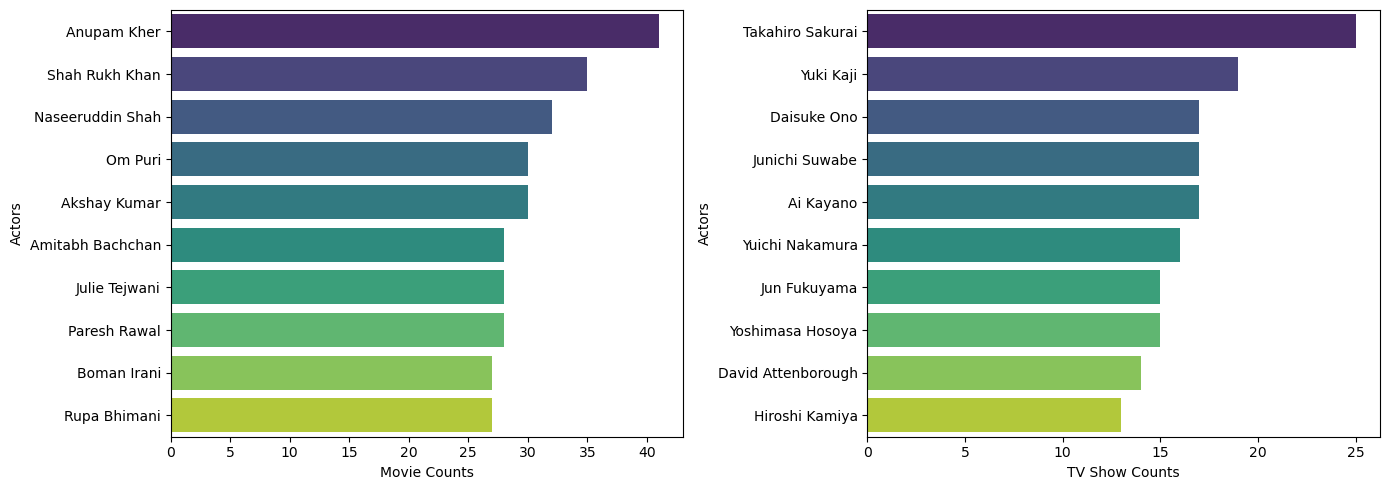

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.barplot(data=top_10_movie_actor, x='title', y='actor', palette='viridis', ax=axes[0])
axes[0].set_xlabel('Movie Counts')
axes[0].set_ylabel('Actors')

sns.barplot(data=top_10_tv_show_actor, x='title', y='actor', palette='viridis', ax=axes[1])
axes[1].set_xlabel('TV Show Counts')
axes[1].set_ylabel('Actors')

plt.tight_layout()
plt.savefig('N_26')
plt.show()

### Top Actors's Stats

##### Analysis

In [168]:
top_10_all_actor_ordered = top_10_all_actor['actor'].to_list()
top_10_all_actor_data = data[data['actor'].isin(top_10_all_actor['actor'])]

top_10_all_actor_preferences = top_10_all_actor_data.groupby('actor').agg(country=('country', lambda x: x.mode()[0]), 
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               director=('director', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_all_actor_preferences.set_index('actor').loc[top_10_all_actor_ordered].reset_index()

,actor,country,genre,director,title,release_year,year_added,time
0,Anupam Kher,India,International Movies,David Dhawan,The Indian Detective,2017,2018,132.524194
1,Shah Rukh Khan,India,International Movies,Ketan Mehta,Maya Memsaab,1993,2017,157.296296
2,Julie Tejwani,India,Children & Family Movies,Rajiv Chilaka,Chhota Bheem Aur Kaala Yodha,2018,2021,60.175000
3,Takahiro Sakurai,Japan,Anime Series,Unknown_Director,GODZILLA City on the Edge of Battle,2018,2019,32.678571
4,Naseeruddin Shah,India,Dramas,Abhishek Chaubey,Shikari,1991,2019,133.216981
5,Rupa Bhimani,India,Children & Family Movies,Rajiv Chilaka,Chhota Bheem Aur Kaala Yodha,2018,2021,61.026316
6,Akshay Kumar,India,International Movies,Anees Bazmee,Aitraaz,2006,2018,140.846154
7,Om Puri,India,International Movies,Farhan Akhtar,Chup Chup Ke,2006,2018,137.811111
8,Yuki Kaji,Japan,Anime Series,Unknown_Director,GANTZ:O,2018,2021,46.235294
9,Amitabh Bachchan,India,International Movies,Karan Johar,Bombay Talkies,2013,2019,144.729412


In [169]:
top_10_movie_actor_ordered = top_10_movie_actor['actor'].to_list()
top_10_movie_actor_data = movie[movie['actor'].isin(top_10_movie_actor['actor'])]

top_10_movie_actor_preferences = top_10_movie_actor_data.groupby('actor').agg(country=('country', lambda x: x.mode()[0]), 
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               director=('director', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_movie_actor_preferences.set_index('actor').loc[top_10_movie_actor_ordered].reset_index()

,actor,country,genre,director,title,release_year,year_added,time
0,Anupam Kher,India,International Movies,David Dhawan,A Wednesday,2013,2018,142.817391
1,Shah Rukh Khan,India,International Movies,Ketan Mehta,Maya Memsaab,1993,2017,157.296296
2,Naseeruddin Shah,India,Dramas,Abhishek Chaubey,Shikari,1991,2019,133.216981
3,Om Puri,India,International Movies,Farhan Akhtar,Chup Chup Ke,2006,2018,137.811111
4,Akshay Kumar,India,International Movies,Anees Bazmee,Aitraaz,2006,2018,140.846154
5,Amitabh Bachchan,India,International Movies,Karan Johar,Bombay Talkies,2013,2019,144.729412
6,Julie Tejwani,India,Children & Family Movies,Rajiv Chilaka,Chhota Bheem Aur Kaala Yodha,2018,2021,68.485714
7,Paresh Rawal,India,International Movies,Ketan Mehta,Maya Memsaab,2006,2018,141.318681
8,Boman Irani,India,International Movies,Farhan Akhtar,Dhan Dhana Dhan Goal,2012,2018,136.642857
9,Rupa Bhimani,India,Children & Family Movies,Rajiv Chilaka,Chhota Bheem Aur Kaala Yodha,2018,2021,67.941176


In [170]:
top_10_tv_show_actor_ordered = top_10_tv_show_actor['actor'].to_list()
top_10_tv_show_actor_data = tv_show[tv_show['actor'].isin(top_10_tv_show_actor['actor'])]

top_10_tv_show_actor_preferences = top_10_tv_show_actor_data.groupby('actor').agg(country=('country', lambda x: x.mode()[0]), 
                                                                               genre=('genre', lambda x: x.mode()[0]), 
                                                                               director=('director', lambda x: x.mode()[0]),
                                                                               title=('title', lambda x: x.mode()[0]),
                                                                               release_year=('release_year', lambda x: x.mode()[0]),
                                                                               year_added=('year_added', lambda x: x.mode()[0]),
                                                                               time=('duration', lambda x: x.mean())).reset_index()

top_10_tv_show_actor_preferences.set_index('actor').loc[top_10_tv_show_actor_ordered].reset_index()

,actor,country,genre,director,title,release_year,year_added,time
0,Takahiro Sakurai,Japan,Anime Series,Unknown_Director,Anohana: The Flower We Saw That Day,2016,2019,1.482143
1,Yuki Kaji,Japan,Anime Series,Unknown_Director,B: The Beginning,2019,2021,1.577778
2,Daisuke Ono,Japan,Anime Series,Unknown_Director,Durarara!!,2016,2021,1.631579
3,Junichi Suwabe,Japan,Anime Series,Unknown_Director,Food Wars!: Shokugeki no Soma,2020,2020,1.641026
4,Ai Kayano,Japan,Anime Series,Unknown_Director,Anohana: The Flower We Saw That Day,2018,2019,1.341463
5,Yuichi Nakamura,Japan,Anime Series,Unknown_Director,Durarara!!,2016,2020,1.447368
6,Jun Fukuyama,Japan,Anime Series,Unknown_Director,Cyborg 009 VS Devilman,2016,2016,1.763158
7,Yoshimasa Hosoya,Japan,Anime Series,Unknown_Director,Haikyu!!,2015,2019,1.545455
8,David Attenborough,United Kingdom,Docuseries,Unknown_Director,Frozen Planet,2011,2016,1.000000
9,Hiroshi Kamiya,Japan,Anime Series,Unknown_Director,Dino Girl Gauko,2015,2019,1.848485


##### **Insights**

* All the most frequent top actors are from India only, which might indicate that title's from India mostly include a limited set of actors (could be multiple factors) or vice versa where titles from these actors are hugely popular and hence part of the title's library.
* Same observation can be drawn for Japan also but for TV shows.
* David Attenboorugh seems like an odd one out for TV show actors, indicating, his popularity in UK.

## **Recommendations**

* Improving the uniformity over the year for title's addition is recommended especially for movies. More title's should be added in first half of year bringing it to the avg. of later part of the year.

* Reducing the delay in movie onboarding is recommended for movies so that audiences who are looking for latest titles have something to explore and watch.
* Introducing movies premiere should also be explored thus not only for reducing the onboarding delay but also making the platform first go to choice for audiences for latest titles.
* Distribution of title's addition should be spread more uniformly across the days of the week, where, most popular title's can be reserved for Friday, but offering titles more uniformly across the days of week.
* TV shows should also be spread across different days of week thus offering new episodes every day.
* More titles are needed to be introduced catering to customers of India, UK, Canada & France, thus, reducing the disparity b/w content offered from US & other countries and more to be offered for the audiences.
* Promoting cross regional content especially for critically acclaimed titles should be explore considering the wide variety of geography platform is catering to thus offering something new to customer's also from his usual content.
* More TV shows are needed to be added for Indian customers in the preferred genre content of the country.
* More movies is needed to be introduced catering to Japanese & South korean customers.
* Projects should be explored with most frequent director & actor by countries offering relevant content in preferred genre. For ex: `Martin Scorsese` with `James Franco` for US markets is recommended to be explored for viability.

In [171]:
#jupyter nbconvert --to webpdf --allow-chromium-download OTT_Streaming_Project.ipynb